# Visual Inspection

# 1. Pre-Processing of Data
- to ensure the features work as intended


## 1.1 import the data

In [1]:
import df_manipulation_functions as dfmf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#read in the the flow and temp data
flow_temp_df = dfmf.create_flow_temp_df("Data/Temp/*.txt","Data/Flow/*.txt") 
#save the dataframe as pickle file
flow_temp_df.to_pickle("Data/flow_temp_df.pkl")
#read in the pickle file
flow_temp_df = pd.read_pickle("Data/flow_temp_df.pkl")
flow_temp_df.head()

Zeitstempel   Stationsname  Stationsnummer  Flow_Wert  Temp_Wert  \
0  1980-01-01 00:00:00  Porte du Scex            2009     82.533        3.7   
1  1980-01-02 00:00:00  Porte du Scex            2009    117.734        3.3   
2  1980-01-03 00:00:00  Porte du Scex            2009    144.834        3.4   
3  1980-01-04 00:00:00  Porte du Scex            2009    148.472        3.4   
4  1980-01-05 00:00:00  Porte du Scex            2009    112.333        3.4   

  Gewässer  
0    Rhône  
1    Rhône  
2    Rhône  
3    Rhône  
4    Rhône

## 1.2 Visual inspection of flow data

- plot two example stations to have a close look at two different curves
- plot all the stations in one plot to see the general trend of the data
- to see if there are any outliers
- to see if there are any stations that are not working properly

### 1.2.1 Plot one station 
- over different time periods (e.g three years, one year)
- make use of averaging over time 
- use average window function to get a smoother curve

In [3]:
# chose station 2019 and get the station data
example_station_number = 2019
Wert = 'Flow_Wert'
example_station_df = dfmf.get_station_df(example_station_number, flow_temp_df)
example_station_df.head()

Stationsnummer          Zeitstempel  Flow_Wert  Temp_Wert
44921            2019  1980-01-01 00:00:00     14.656        3.9
44922            2019  1980-01-02 00:00:00     22.752        3.4
44923            2019  1980-01-03 00:00:00     23.579        3.3
44924            2019  1980-01-04 00:00:00     25.064        3.4
44925            2019  1980-01-05 00:00:00     17.645        4.1

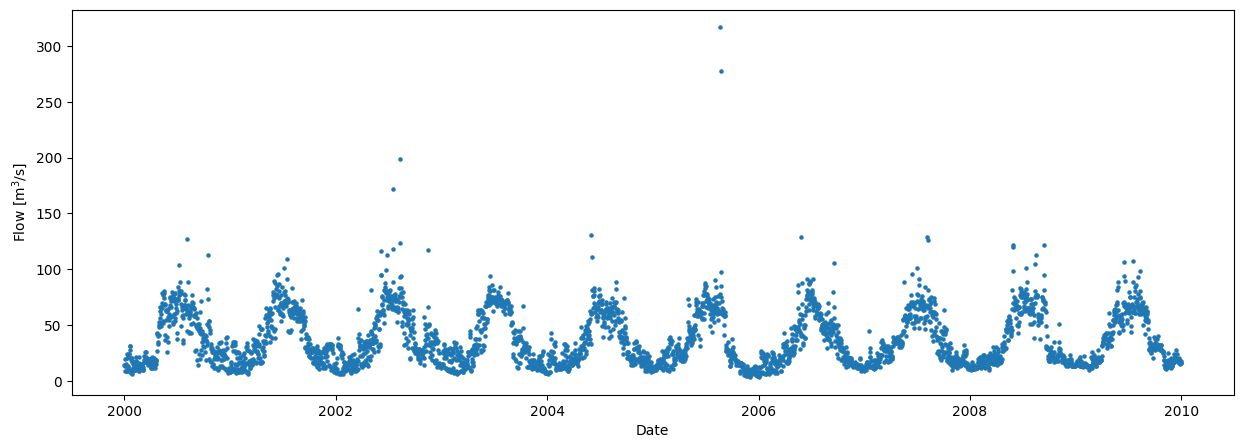

In [4]:
# get three years time period
example_station_3years_df = dfmf.get_time_period(example_station_number, '2000-01-01', '2010-01-01', flow_temp_df)

#plot the station data
plt.figure(figsize=(15,5))
plt.scatter(example_station_3years_df.index, example_station_3years_df[Wert], label=Wert, s=5)
station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == example_station_number]['Stationsname'].unique()[0]
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')


#plt.title(station_name + " " + str(example_station_number))

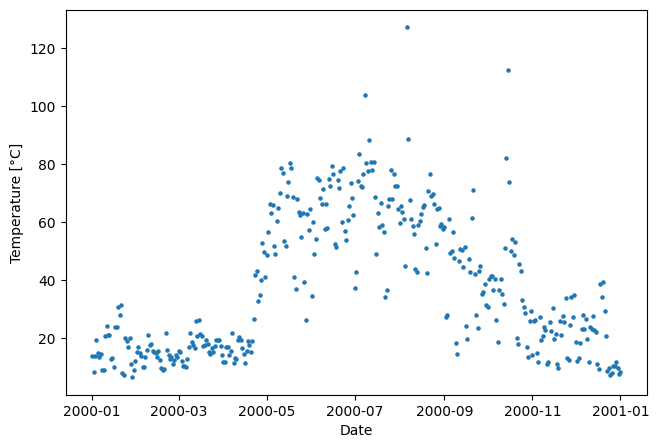

In [5]:

#get one year time period
example_station_1year_df = dfmf.get_time_period(example_station_number, '2000-01-01', '2001-01-01', flow_temp_df)

#plot the station data over one year
plt.figure(figsize=(7.5,5))
plt.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s=5)
plt.xlabel('Date')
if Wert == 'Temp_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:  
    plt.ylabel('Temperature [°C]')

### Results
- The data is noisy due to the interval of the measurements
- we do averageing by day over the 40 years of data to get a clearer curve


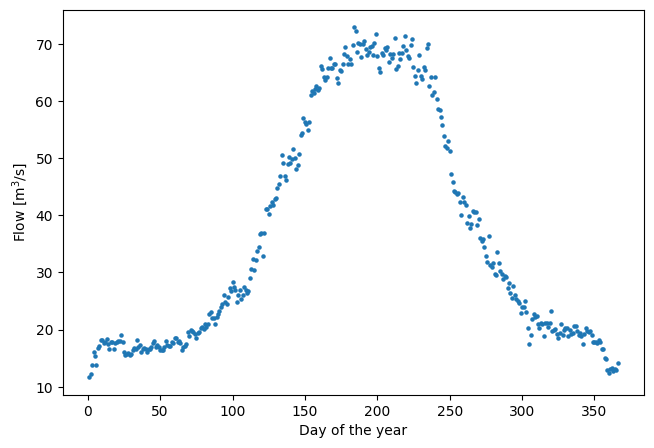

In [6]:
station_daily_averaged_df = dfmf.get_daily_averaged_df(example_station_number, flow_temp_df)
station_daily_averaged_df.head()

#plot the daily averaged data
plt.figure(figsize=(7.5,5))
plt.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=5)
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')

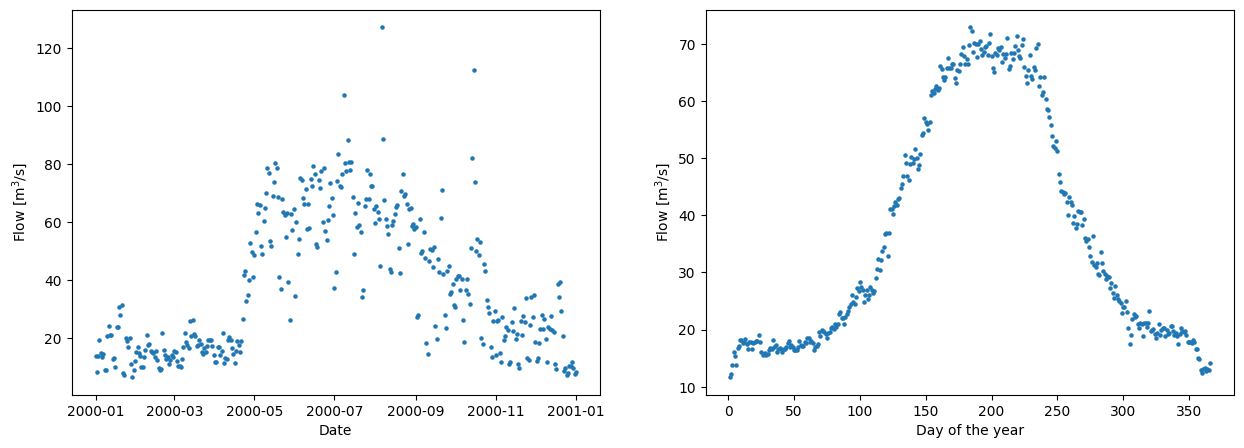

In [7]:
#plot the daily averaged data for both window lengths in plots side by side
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=5)
ax2.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s = 5)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')

ax2.set_xlabel('Date')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')

### Results
- The curve looks better but still a bit noisy


c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


     Stationsnummer  Flow_Wert  Temp_Wert
0            2019.0  14.347127   3.966326
1            2019.0  13.948737   3.960862
2            2019.0  13.681553   3.951529
3            2019.0  13.654218   3.932895
4            2019.0  13.580943   3.916489
..              ...        ...        ...
361          2019.0  16.064353   4.027024
362          2019.0  15.638818   4.021480
363          2019.0  15.320141   4.012748
364          2019.0  14.993998   4.010911
365          2019.0  14.741146   3.962420

[366 rows x 3 columns]


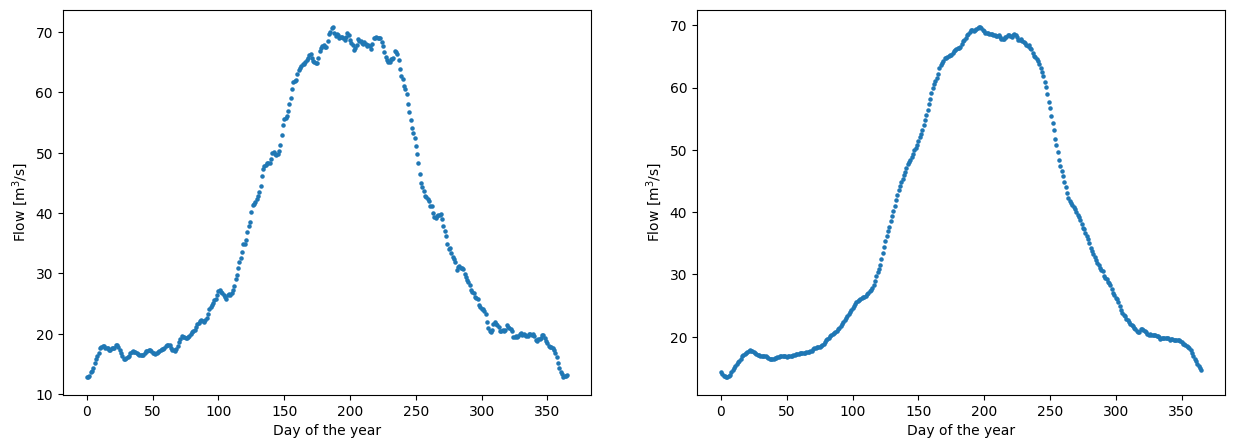

In [8]:


# get running mean of 5 days
window_length_long = 15
window_length_short = 5

station_daily_averaged_5days_mean_df = dfmf.get_running_mean_df(example_station_number, window_length_short, flow_temp_df, Wert)
station_daily_averaged_15days_mean_df = dfmf.get_running_mean_df(example_station_number, window_length_long, flow_temp_df, Wert)

#plot the daily averaged data for both window lengths in plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_5days_mean_df.index, station_daily_averaged_5days_mean_df[Wert], label=Wert, s=5)
ax2.scatter(station_daily_averaged_15days_mean_df.index, station_daily_averaged_15days_mean_df[Wert], label=Wert, s = 5)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')

ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')

#print all entries of station_daily_averaged_15days_mean_df
print(station_daily_averaged_15days_mean_df)

## Results
- The curve loooks like a continuing function and the now calculated features might give reasonable values


## 1.2.2 Non Periodic station 
- there are some stations whick lack the clear periodicity of the given example 


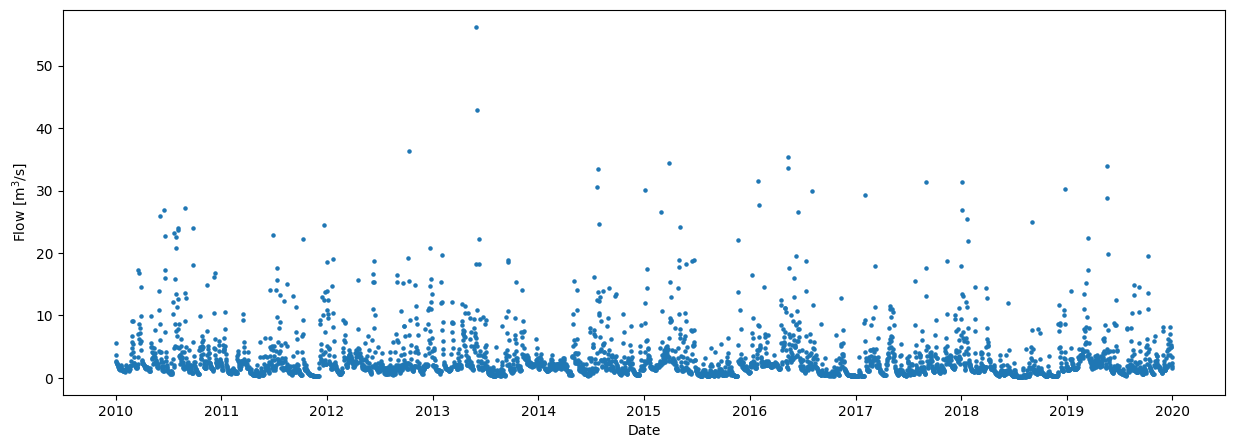

In [9]:
example_station_number2 = 2374
example_station_3years_df = dfmf.get_time_period(example_station_number2, '2010-01-01', '2020-01-01', flow_temp_df)

#plot the station data
plt.figure(figsize=(15,5))
plt.scatter(example_station_3years_df.index, example_station_3years_df[Wert], label=Wert, s=5)
station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == example_station_number2]['Stationsname'].unique()[0]
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]') 
# plt.title(station_name + " " + str(example_station_number2))

Text(0, 0.5, 'Flow [m$^3$/s]')

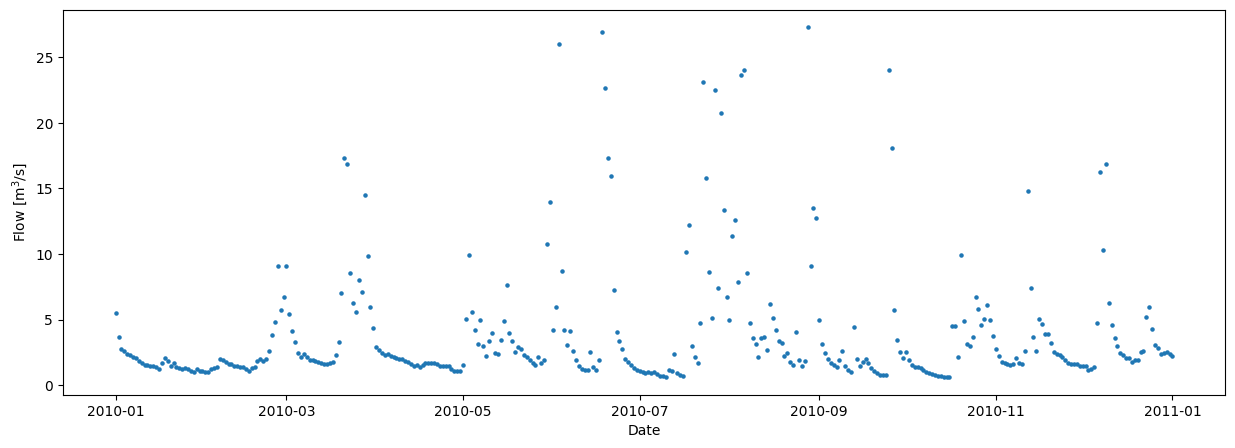

In [10]:
#get one year time period
example_station_1year_df = dfmf.get_time_period(example_station_number2, '2010-01-01', '2011-01-01', flow_temp_df)
#plot the station data over one year
plt.figure(figsize=(15,5))
plt.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s=5)
plt.xlabel('Date')
plt.ylabel('Flow [m$^3$/s]')

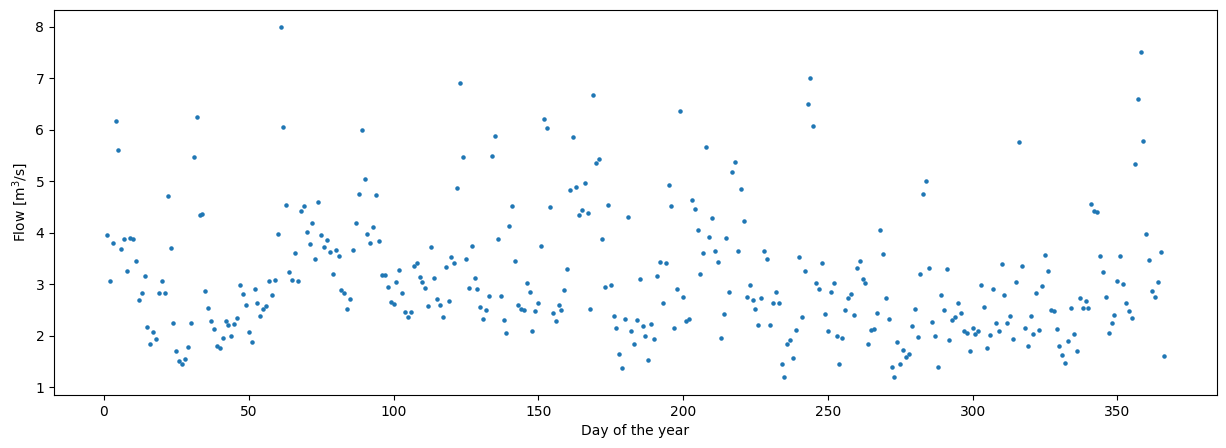

In [11]:
station_daily_averaged_df = dfmf.get_daily_averaged_df(example_station_number2, flow_temp_df)
station_daily_averaged_df.head()

#plot the daily averaged data
plt.figure(figsize=(15,5))
plt.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=5)
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')



# Results
- for this station there is no clear periodicity visible 
- it will be difficult to analyze this data with the same features as the other ones
- maybe there needs to be a feature vor periodicity (similarity by year)

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


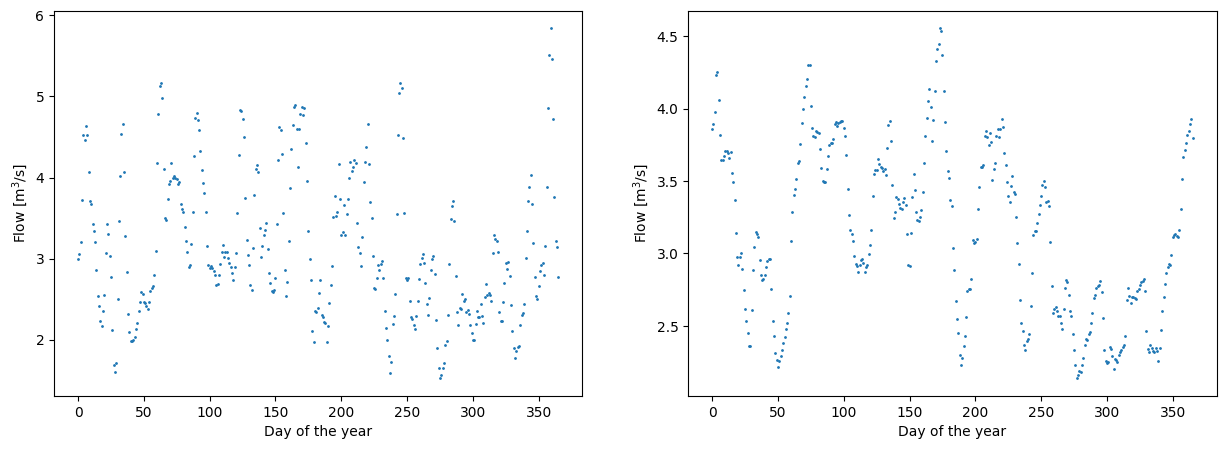

In [12]:
# get running mean of 5 days
window_length_long = 15
window_length_short = 5


station_daily_averaged_5days_mean_df = dfmf.get_running_mean_df(example_station_number2, window_length_short, flow_temp_df, Wert)
station_daily_averaged_15days_mean_df = dfmf.get_running_mean_df(example_station_number2, window_length_long, flow_temp_df, Wert)

#plot the daily averaged data for both window lengths in plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_5days_mean_df.index, station_daily_averaged_5days_mean_df[Wert], label=Wert, s=1)
ax2.scatter(station_daily_averaged_15days_mean_df.index, station_daily_averaged_15days_mean_df[Wert], label=Wert, s=1)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')
ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')



## Results
- the curve looks still very noisy and it is difficult to say wether this actually resembles some behaviour

# 2. Analysis of all curves and deduction of features


## 2.1 Plot all Stations

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

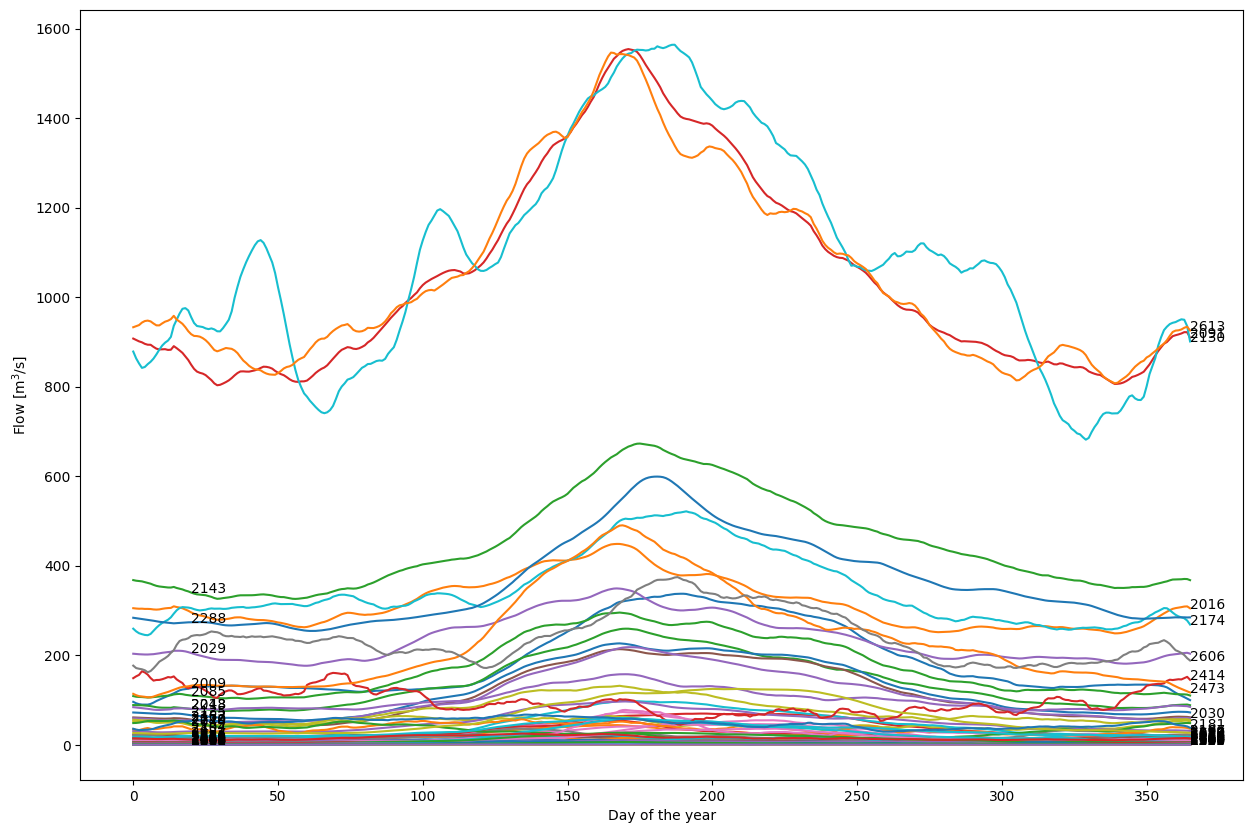

In [13]:
# plot all window function data of each station in one plot
window_length_long = 15

i = 20

plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
    plt.plot(station_df.index, station_df[Wert], label=station_number)
    
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    
   
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')

    

# plt.figure(figsize=(20,50))
# for station_number in flow_temp_df['Stationsnummer'].unique():
#     station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, 'Temp_Wert')
#     plt.scatter(station_df.index, station_df['Temp_Wert'], label=station_number)

# #limit plot to positive values
# plt.ylim(0, 30)
# plt.show()



c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

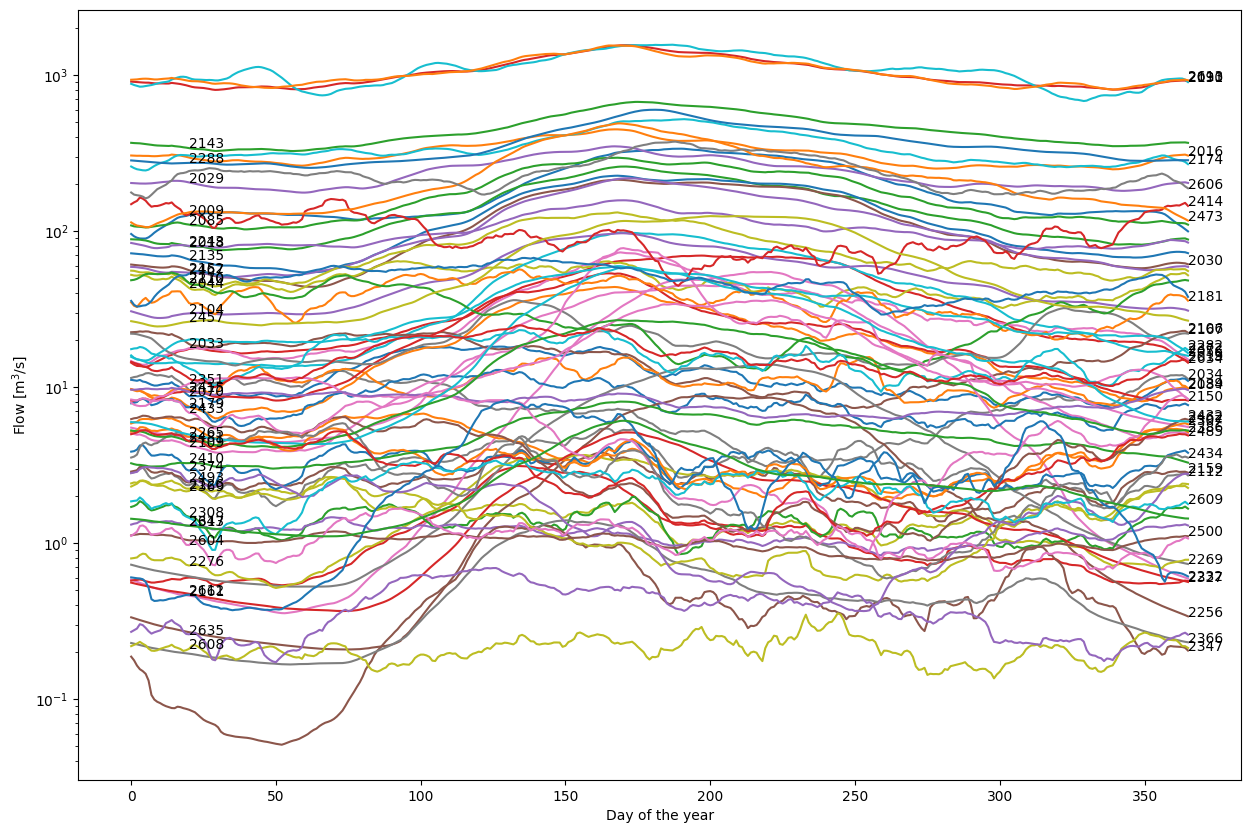

In [14]:
# plot all window function data of each station in one plot with logarithmic scaleing
window_length_long = 15

i = 20

plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
    plt.plot(station_df.index, station_df[Wert], label=station_number)
    
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    
   
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')

#make y axis logarithmic
plt.yscale('log')

    

# plt.figure(figsize=(20,50))
# for station_number in flow_temp_df['Stationsnummer'].unique():
#     station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, 'Temp_Wert')
#     plt.scatter(station_df.index, station_df['Temp_Wert'], label=station_number)

# #limit plot to positive values
# plt.ylim(0, 30)
# plt.show()



## Result 
- The data with a larger flow mean all look like curves of clear periodicity 
- for some with less flow the curve looks way more noisy 
- for the curves below 100 cubic in this plot nothing is visible 


c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

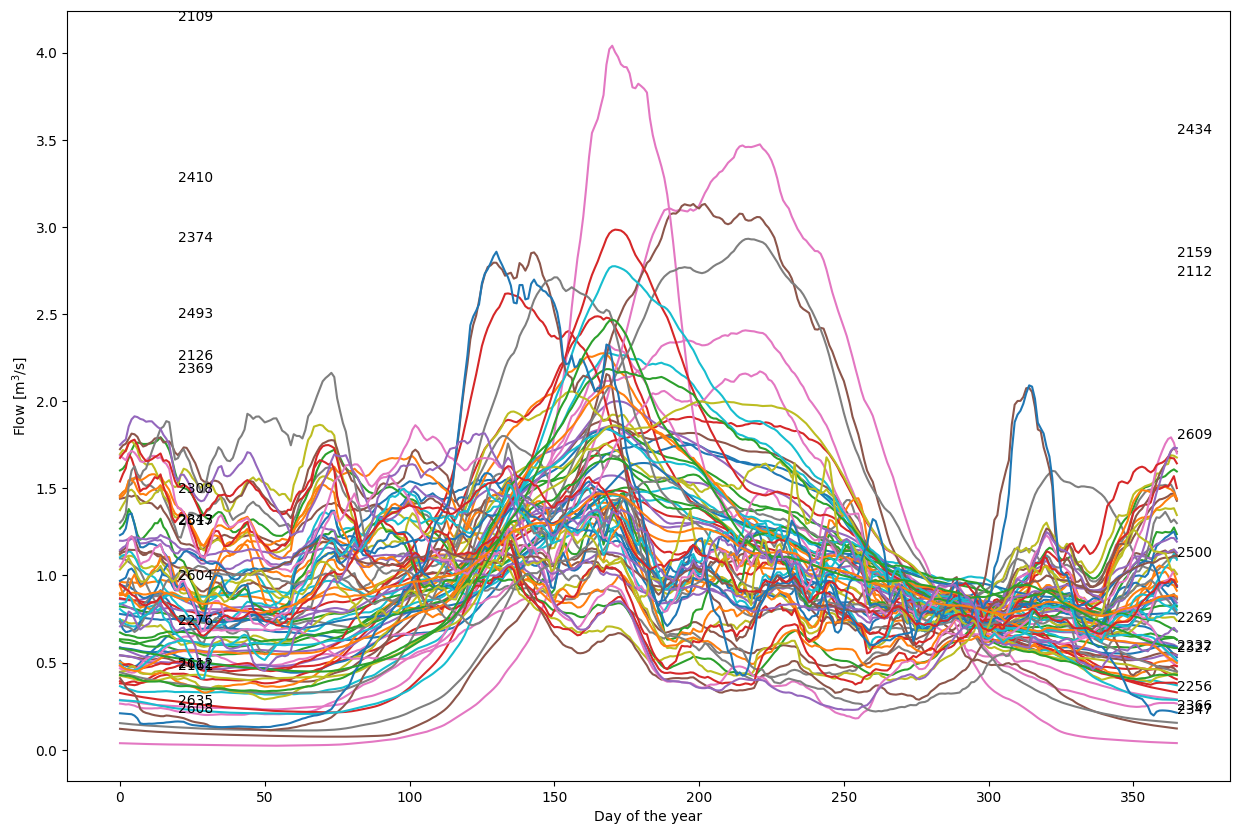

In [15]:
# plot all window function data of each station in one plot
import numpy as np
window_length_long = 15
i = 20
#plot the data normalized by the mean of each station 
plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.plot(station_df.index, station_df[Wert] / np.mean(station_df[Wert]), label=station_number)
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
plt.show()



c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

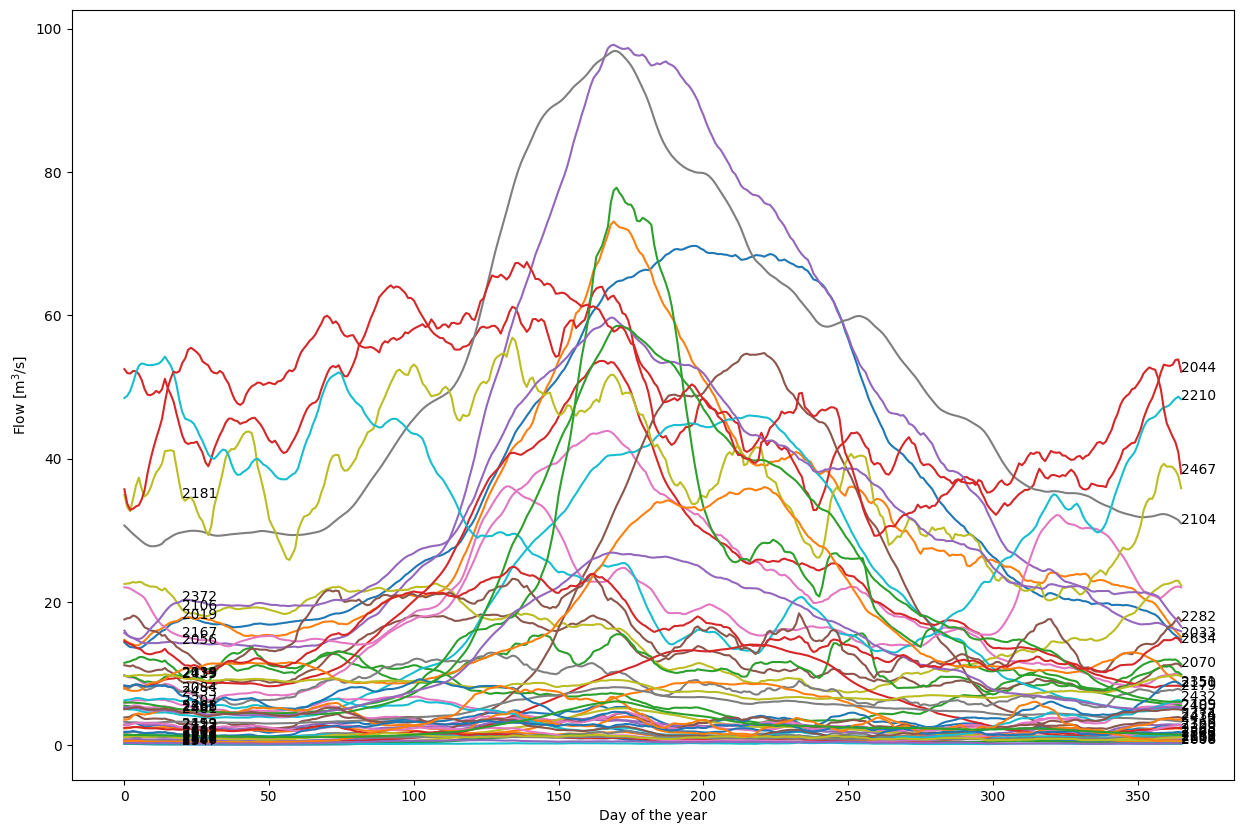

In [16]:
# plot the flow data of all the stations for max flow below 100 
window_length_long = 15
i = 20
plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    if(station_df[Wert].max() < 100):
        plt.plot(station_df.index, station_df[Wert], label=station_number)
        plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
        if(i == 20):
            i = 365
        else:
            i=20
    #annotate the plotted points with the station number    
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
    
plt.show()


c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

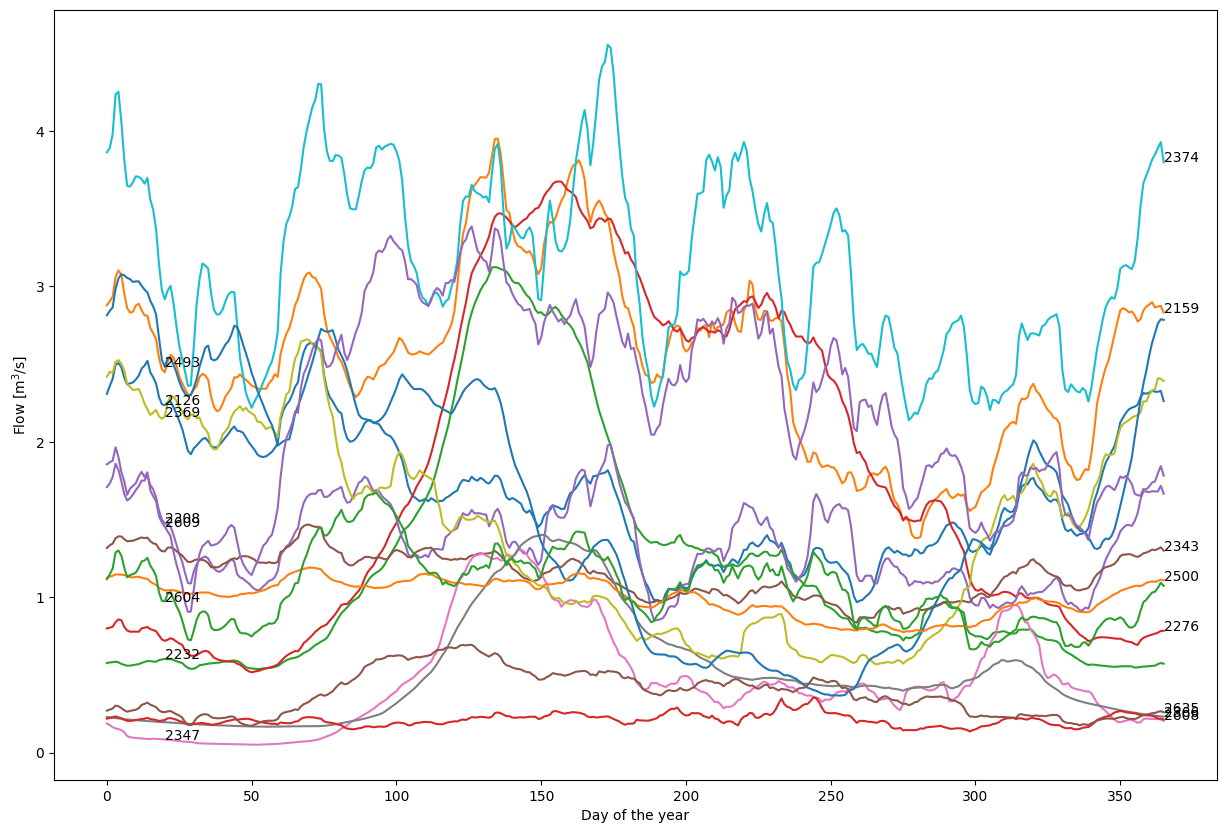

In [17]:
# plot the flow data of all the stations for max flow below 20
window_length_long = 15

i = 20

plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    if(station_df[ Wert].max() < 5):
        plt.plot(station_df.index, station_df[Wert], label=station_number)
    
        plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    
   
        if(i == 20):
            i = 365
        else:
            i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
plt.show()


## Results
- The less flow the more noisy the curve looks
- the curves with less flow are more difficult to analyze
- this is due to the fact, that smaller flows are more affected by rainfalls and other weather conditions
- the curves with more flow are more stable and therefore easier to analyze

## 2.2 visual inspection of typical curves for flow data
- to get a feeling for the data
- plot the chosen functions in one plot to see the general differences
- plot the chosen functions in different plots ti have a look at std and average time over a certain value
 

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

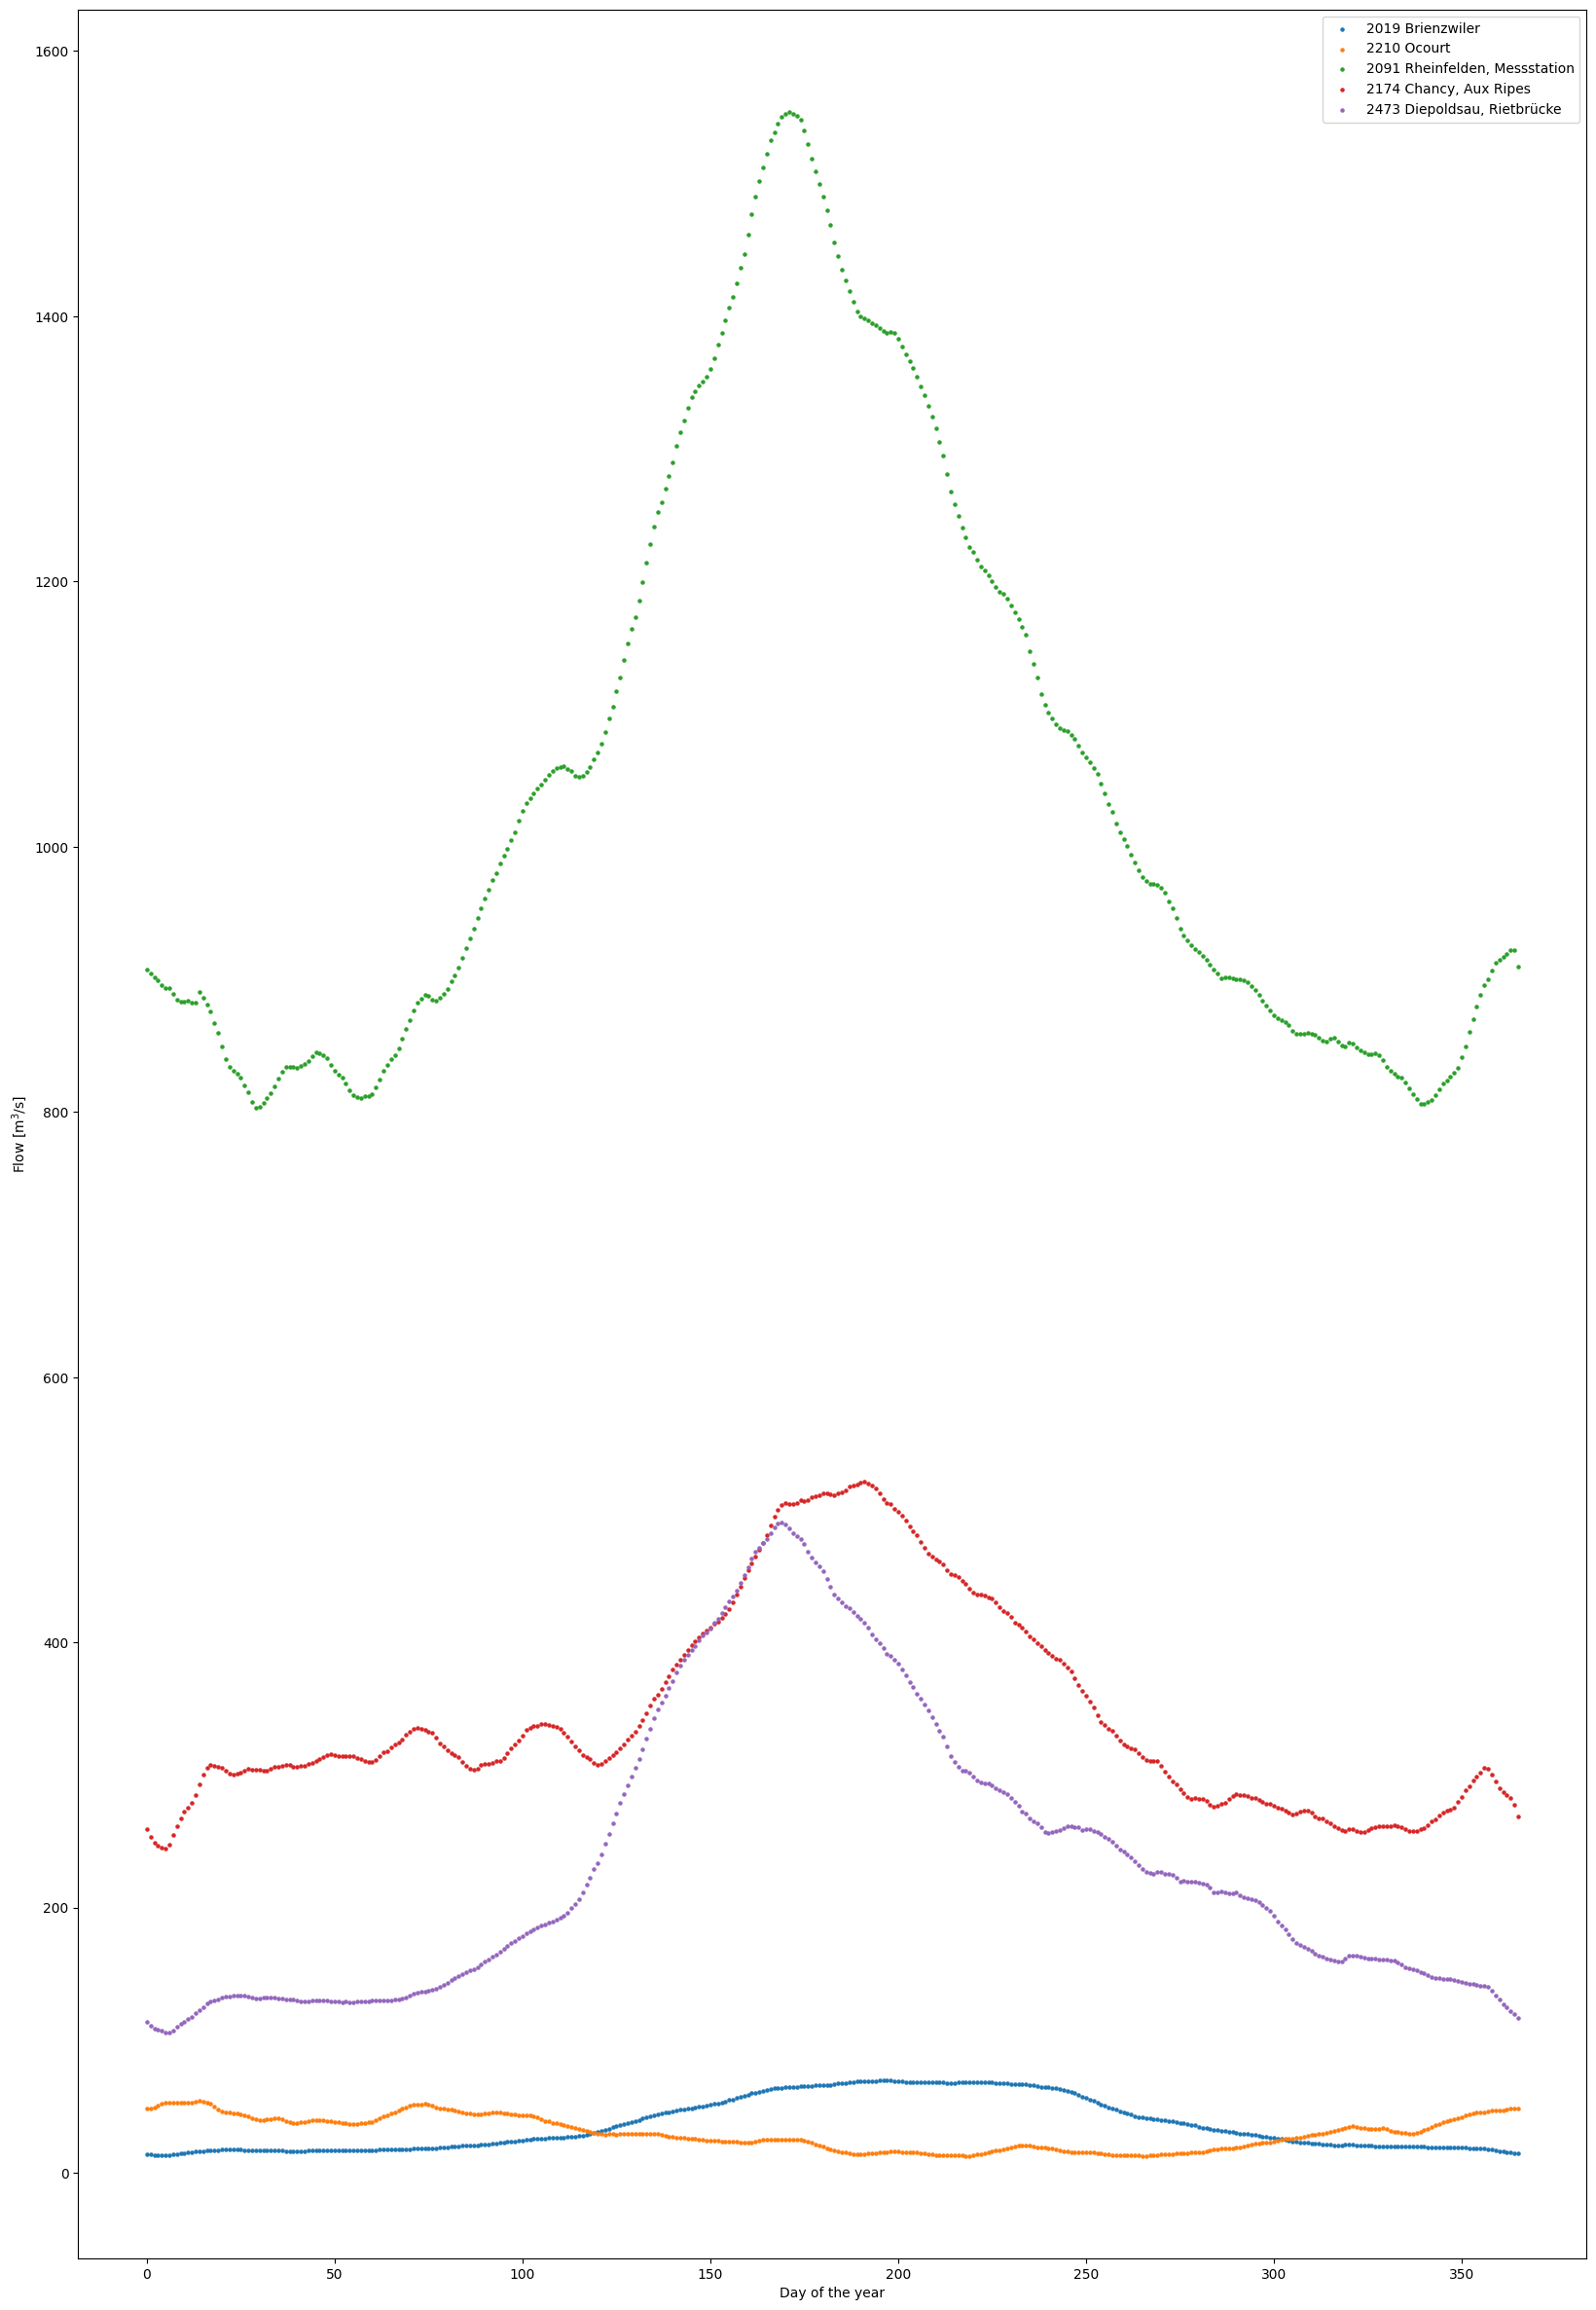

In [18]:
special_stations_numbers = [2019,2210,2091,2174, 2473]

labels = list()
#plot the stations belonging to the special station numbers
plt.figure(figsize=(20,30))
for station in special_stations_numbers:
    station_data = dfmf.get_running_mean_df(station, 15, flow_temp_df, Wert)
    plt.scatter(station_data.index, station_data[Wert], s = 5)
    station_data['mean'] = station_data[Wert].mean()
    #plt.plot(station_data.index, station_data['mean'])
    #add to each curve the number and name of the station
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station]['Stationsname'].unique()[0]
    labels.append(str(station)+ " " + station_name)       
plt.xlabel('Day of the year')

if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
    
plt.legend(labels)


## Results:
- It is clearly visible that we got different averages and different std's
- The flux starts increasing at different times
- some of the stations are highly influenced by rainfalls or dams

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


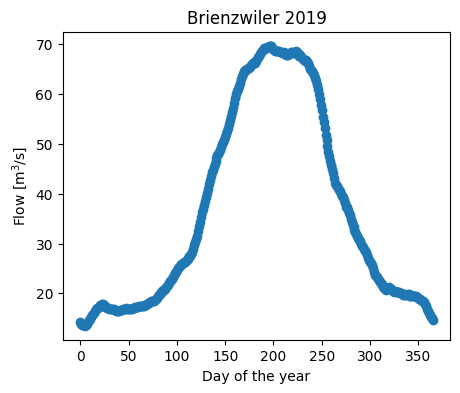

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


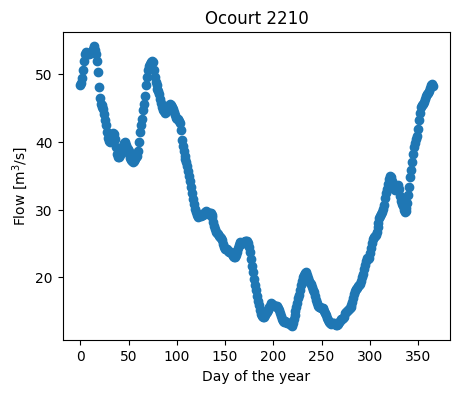

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


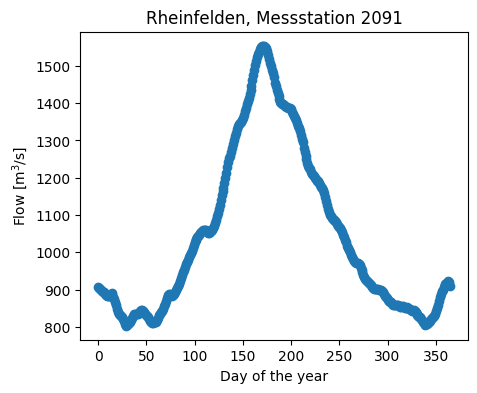

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


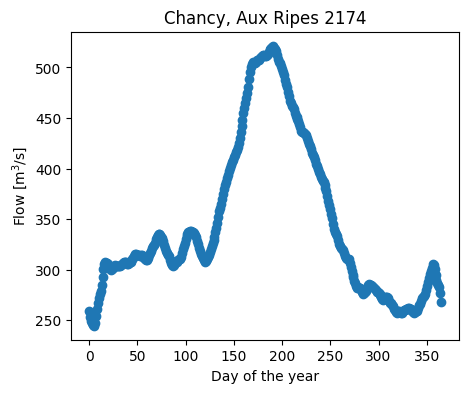

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


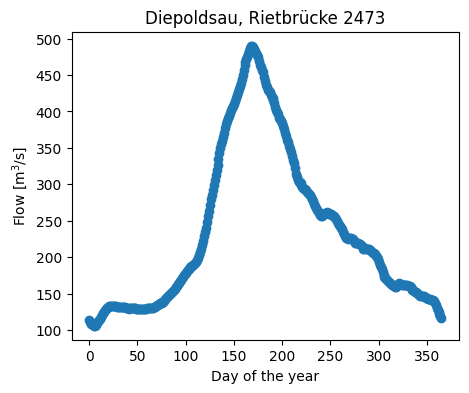

In [19]:
# plot the special stations seperatly

for station_number in special_stations_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.figure(figsize=(5,4))
    plt.scatter(station_data.index, station_data[Wert])
    #print stations name and number	as title
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station_number]['Stationsname'].unique()[0]
    plt.title(station_name + ' ' + str(station_number))

    plt.xlabel('Day of the year')
    if Wert == 'Flow_Wert':
        plt.ylabel('Flow [m$^3$/s]')
    else:
        plt.ylabel('Temperature [°C]')
        
    
    plt.show()


## Results:
- we see three main types of curves
- 2019 with a steady increase and a long time period of high flow
- 2091 with a steep increase and a short time period of maximum flow and a high average flow
- 2210 with an abnormal flow pattern due to a dam, with high flow in winter and low flow in summer, additionally the flow is very irregular


# 3. Feature tests
- goal: to find features which characterize the above mentioned curves


In [20]:

# create df with same columns as staion_df
merged_station_running_df = pd.DataFrame(columns=['Zeitstempel', 'Stationsnummer',	'Flow_Wert', 	'Temp_Wert'])
chosen_example_station_numbers = [2019,2210,2091]

for station_number in chosen_example_station_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    merged_station_running_df = merged_station_running_df.append(station_data)

merged_station_running_df.head()



c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_31100\3474461945.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_station_running_df = merged_station_running_df.append(station_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Te

Zeitstempel  Stationsnummer  Flow_Wert  Temp_Wert
0         NaN          2019.0  14.347127   3.966326
1         NaN          2019.0  13.948737   3.960862
2         NaN          2019.0  13.681553   3.951529
3         NaN          2019.0  13.654218   3.932895
4         NaN          2019.0  13.580943   3.916489

In [21]:
#calculate the mean of the running mean, std, min, max, median, values for each station and save them to df ruda_features_df
example_basic_features_df = pd.DataFrame(columns=['Stationsnummer', 'mean', 'std', 'min', 'max', 'median'])
for station_number in chosen_example_station_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    example_basic_features_df = example_basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
example_basic_features_df.head()

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_31100\2976404659.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  example_basic_features_df = example_basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_man

Stationsnummer         mean         std         min          max  \
0          2019.0    36.497151   19.958256   13.504717    69.685184   
1          2210.0    30.234694   12.500769   12.824196    54.216881   
2          2091.0  1044.749625  222.919972  803.101167  1554.169571   

       median       range  
0   27.609573   56.180466  
1   29.272568   41.392685  
2  956.405837  751.068405

## 3.1 Show the different features in the plotted data

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-w

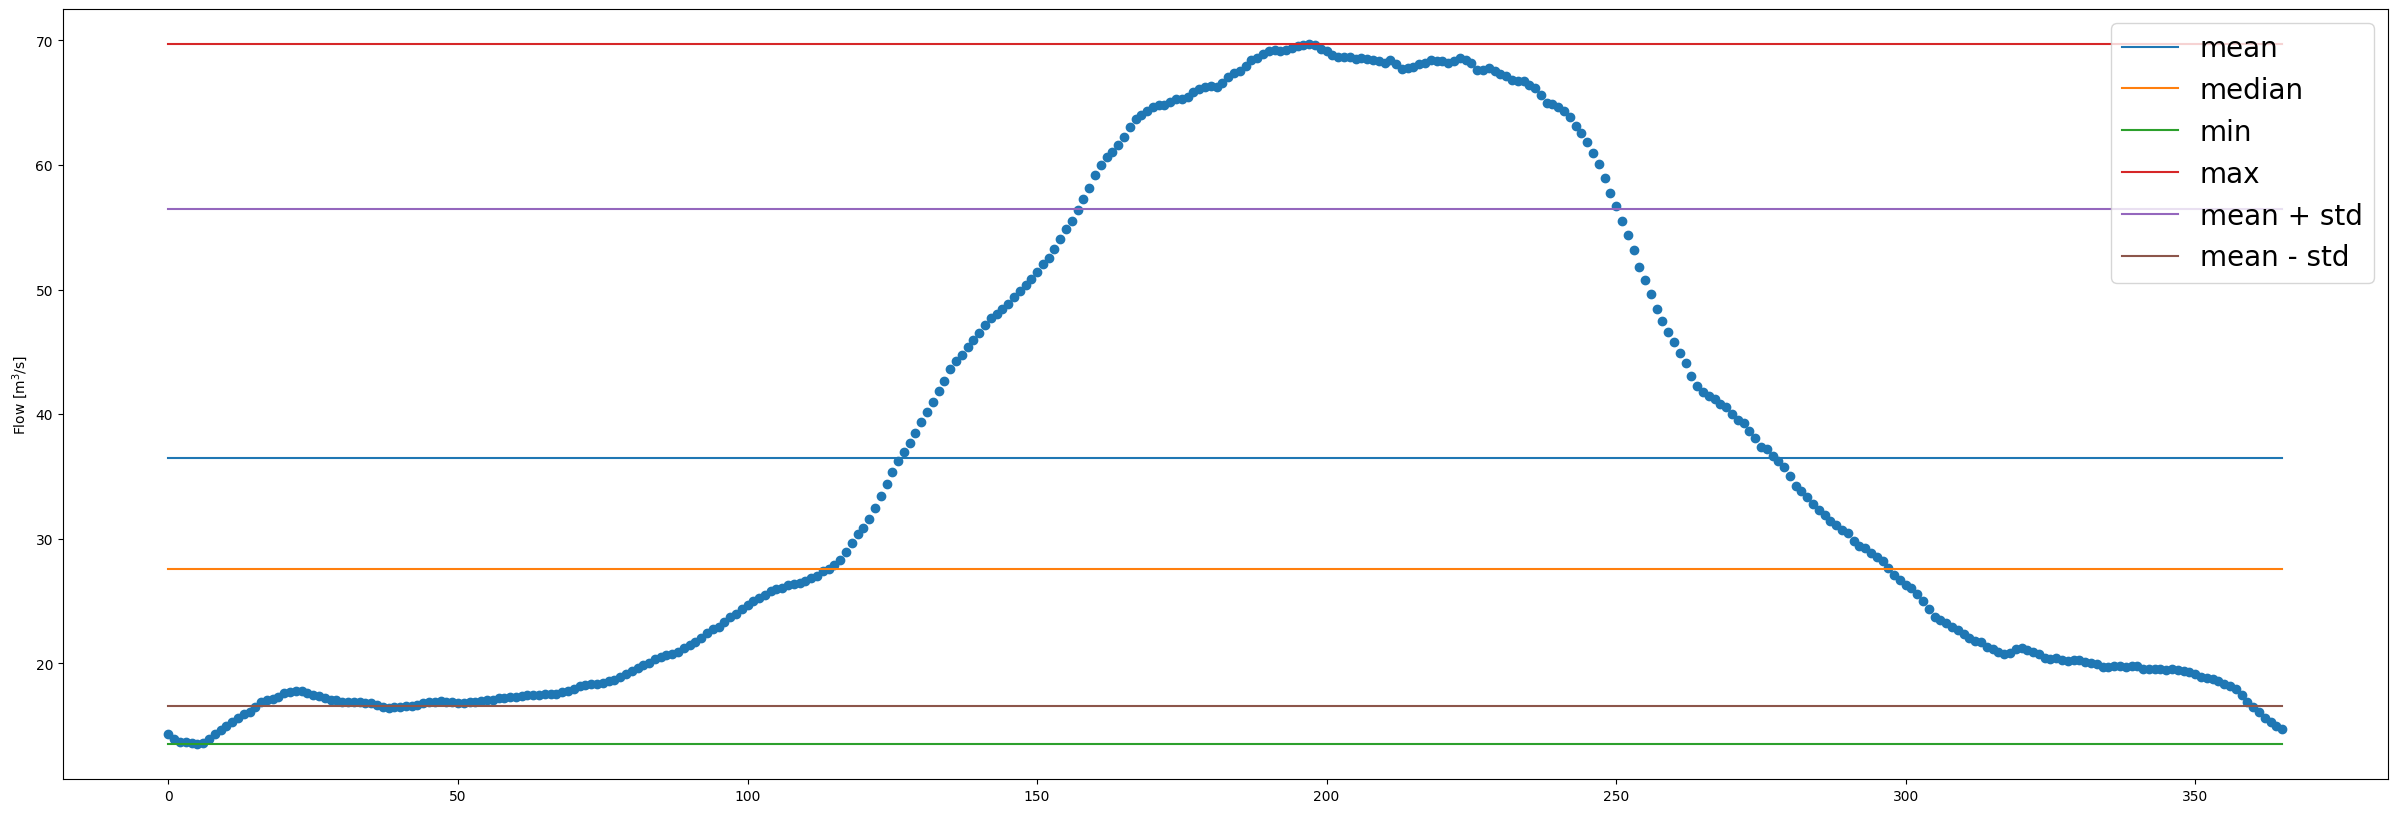

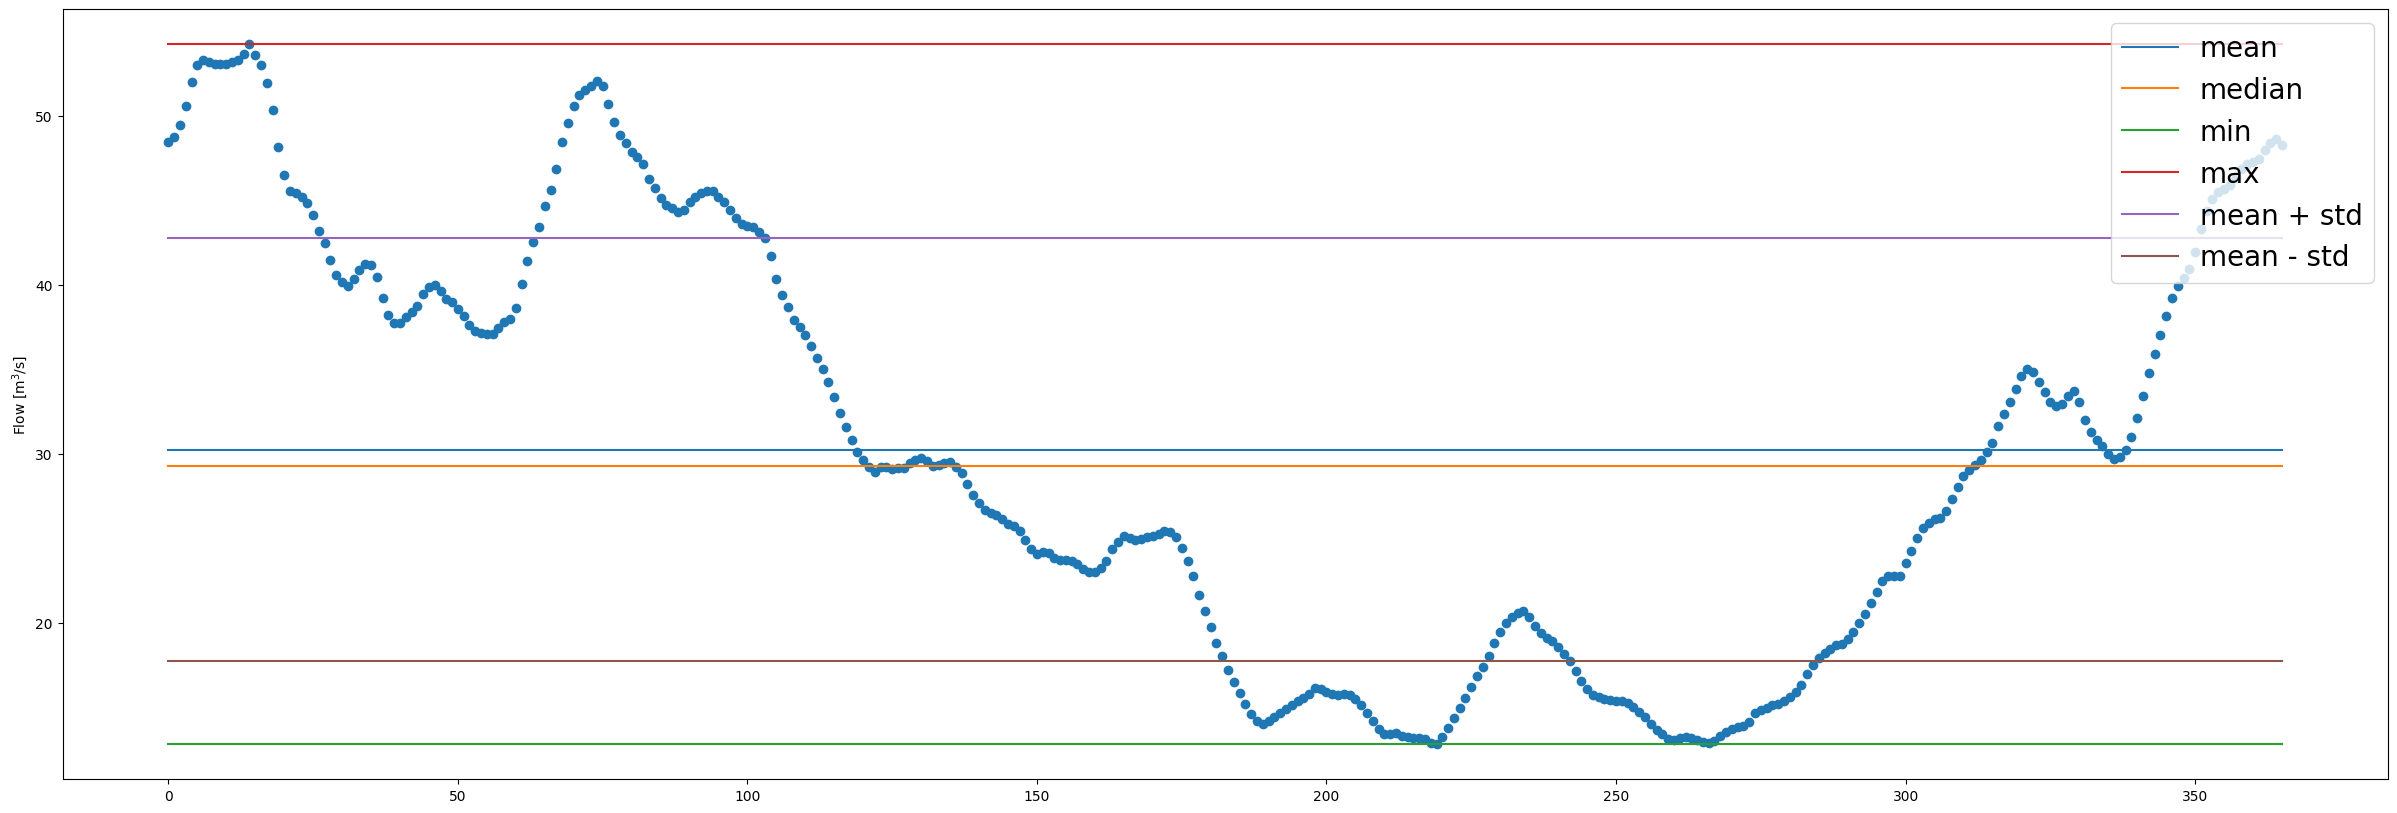

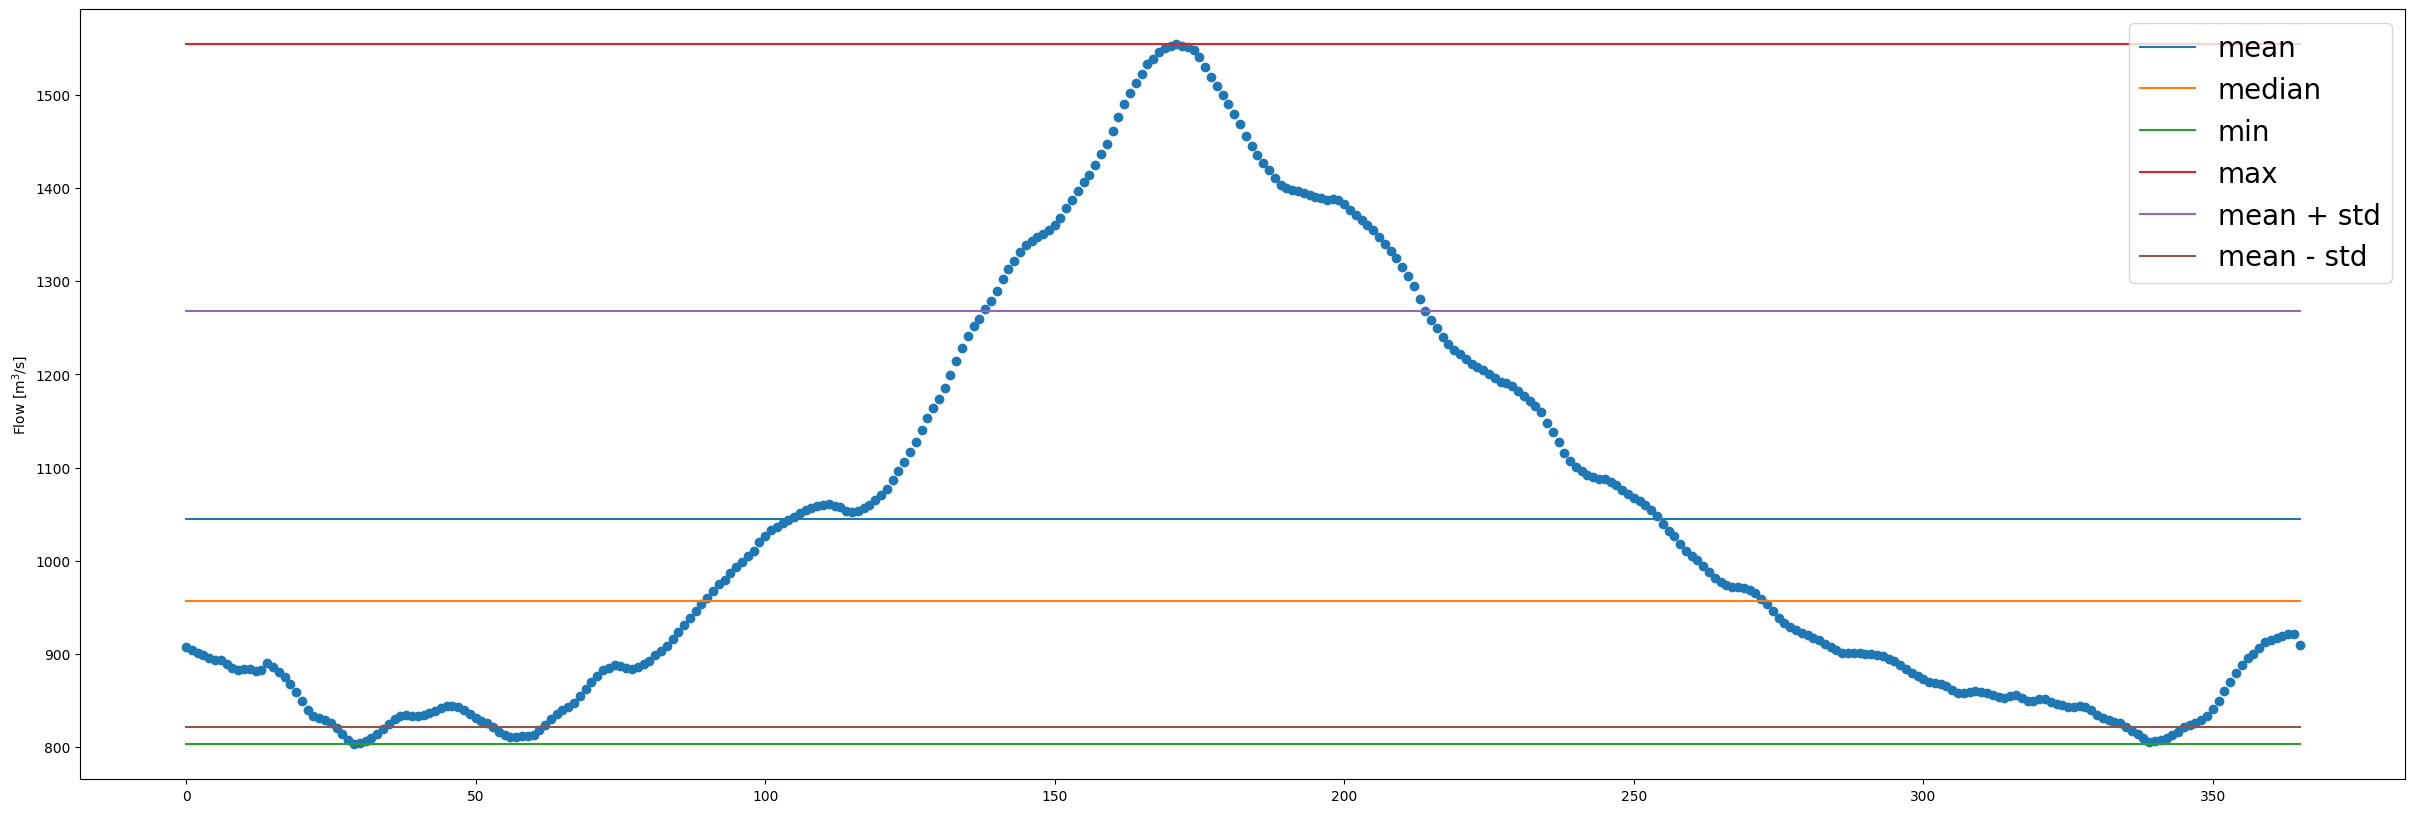

In [22]:
for station_number in chosen_example_station_numbers:
    #plot min, max and mean and median of each station
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.figure(figsize=(30,10))
    plt.scatter(station_data.index, station_data[Wert])
    plt.plot(station_data.index, [station_data[Wert].mean()] *366, label='mean')
    plt.plot(station_data.index, [station_data[Wert].median()]*366, label='median')
    plt.plot(station_data.index, [station_data[Wert].min()]*366, label='min')
    plt.plot(station_data.index, [station_data[Wert].max()]*366, label='max')
    # plot the standard deviation in an appropriate way
    plt.plot(station_data.index, [station_data[Wert].mean() + station_data[Wert].std()]*366, label='mean + std')
    plt.plot(station_data.index, [station_data[Wert].mean() - station_data[Wert].std()]*366, label='mean - std')
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station_number]['Stationsname'].unique()[0]
    #plt.title(station_name + ' ' + str(station_number))
    #make bigger legend
    plt.legend( loc="upper right", fontsize = "20")
    if Wert == 'Flow_Wert':
        plt.ylabel('Flow [m$^3$/s]')
    else:
        plt.ylabel('Temperature [°C]')
        
    plt.ylabel('Flow [m$^3$/s]')

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


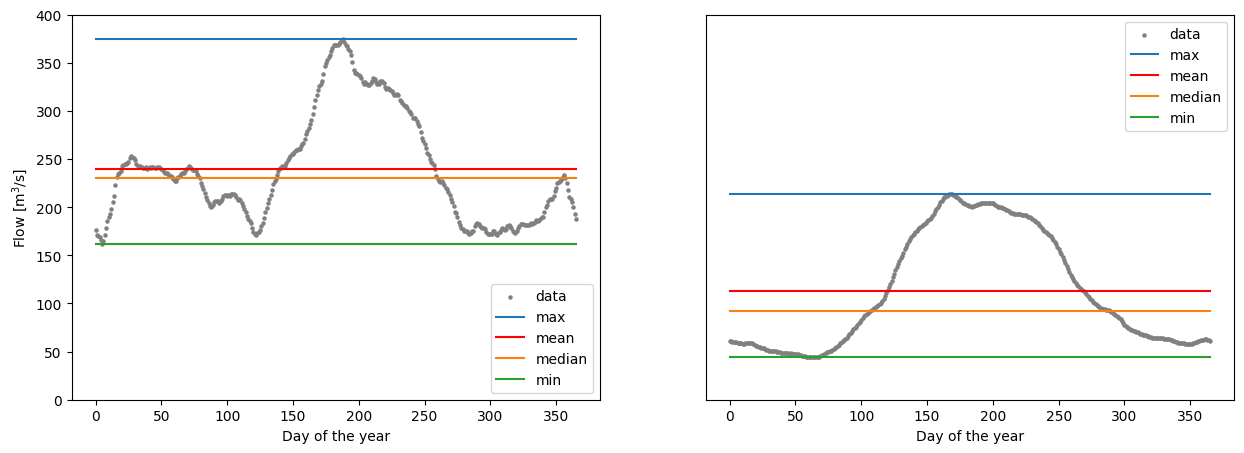

In [23]:
#plot the above made plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
#plot station 2606
station_number = 2606
station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
ax1.scatter(station_df.index, station_df[Wert], label=station_number, color='grey' ,s = 5)
ax1.plot(station_df.index, [station_df[Wert].max()]*366, label='max')
ax1.plot(station_df.index, [station_df[Wert].mean()] *366, label='mean', color = 'red')
ax1.plot(station_df.index, [station_df[Wert].median()]*366, label='median')
ax1.plot(station_df.index, [station_df[Wert].min()]*366, label='min')

ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')
#ax1.set_title('Station: 2606')
#plot station 2030
station_number = 2030
station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
ax2.scatter(station_df.index, station_df[Wert], label=station_number, color='grey', s=5)
ax2.plot(station_df.index, [station_df[Wert].max()]*366, label='max')

ax2.plot(station_df.index, [station_df[Wert].mean()] *366, label='mean', color = 'red')
ax2.plot(station_df.index, [station_df[Wert].median()]*366, label='median')
ax2.plot(station_df.index, [station_df[Wert].min()]*366, label='min')

ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')
#ax2.set_title('Station: 2030')

#set scale of y axis to be the same for both plots
ax1.set_ylim(0, 400)
ax2.set_ylim(0, 400)

#remove y label from second plot and remove y ticks from second plot
ax2.yaxis.set_label_text('')
ax2.set_yticks([])

#change 2606 in legend to data 
handles, labels = ax1.get_legend_handles_labels()
labels[0] = 'data'
ax1.legend(handles, labels, loc="lower right", )

#change 2030 in legend to data
handles, labels = ax2.get_legend_handles_labels()
labels[0] = 'data'
ax2.legend(handles, labels, loc="upper right", )


# title to size grösse

#make legend without station number




c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


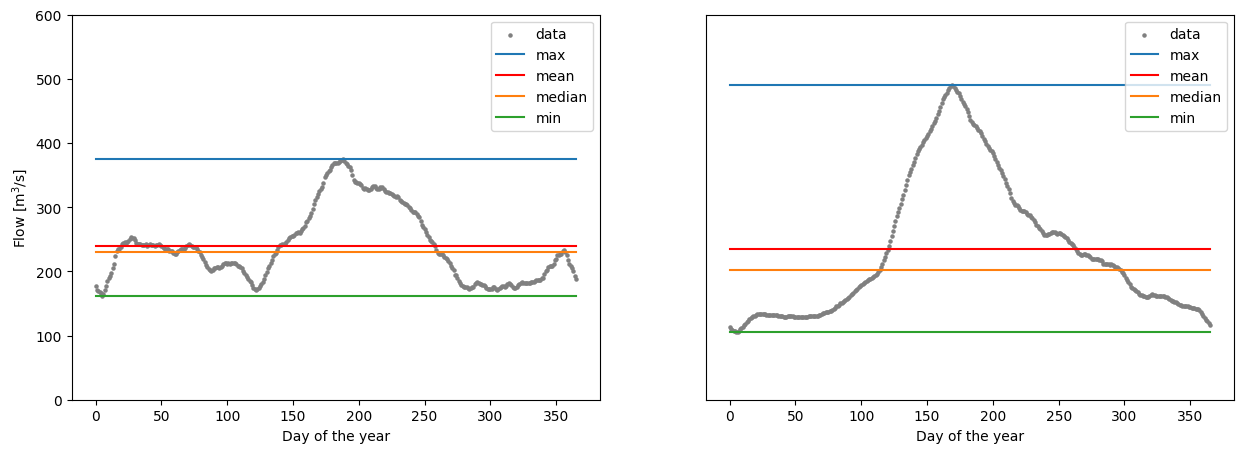

In [24]:
#plot the above made plots side by side
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(15,5))
#plot station 2606
station_number = 2473
station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
ax1.scatter(station_df.index, station_df[Wert], label=station_number, color='grey' ,s = 5)
ax1.plot(station_df.index, [station_df[Wert].max()]*366, label='max')
ax1.plot(station_df.index, [station_df[Wert].mean()] *366, label='mean', color = 'red')
ax1.plot(station_df.index, [station_df[Wert].median()]*366, label='median')
ax1.plot(station_df.index, [station_df[Wert].min()]*366, label='min')

ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')
#ax1.set_title('Station: 2606')
#plot station 2030
station_number = 2606
station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
ax2.scatter(station_df.index, station_df[Wert], label=station_number, color='grey', s=5)
ax2.plot(station_df.index, [station_df[Wert].max()]*366, label='max')

ax2.plot(station_df.index, [station_df[Wert].mean()] *366, label='mean', color = 'red')
ax2.plot(station_df.index, [station_df[Wert].median()]*366, label='median')
ax2.plot(station_df.index, [station_df[Wert].min()]*366, label='min')

ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')
#ax2.set_title('Station: 2030')

#set scale of y axis to be the same for both plots
ax1.set_ylim(0, 600)
ax2.set_ylim(0, 600)

#remove y label from second plot and remove y ticks from second plot
ax1.yaxis.set_label_text('')
ax1.set_yticks([])

#change 2606 in legend to data 
handles, labels = ax1.get_legend_handles_labels()
labels[0] = 'data'
ax1.legend(handles, labels, loc="upper right", )

#change 2030 in legend to data
handles, labels = ax2.get_legend_handles_labels()
labels[0] = 'data'
ax2.legend(handles, labels, loc="upper right", )


# title to size grösse

#make legend without station number




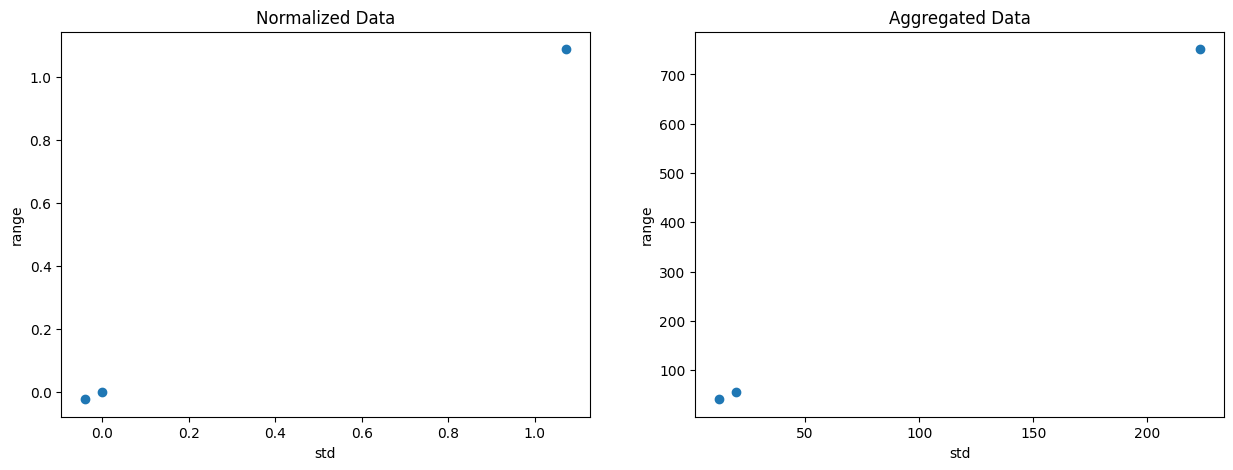

In [25]:
import importlib
importlib.reload(dfmf)




#plot the range and std of the ruda_fetures_df in a scatterpllot
basic_normalized_chosen_df = dfmf.normalize_data(example_basic_features_df)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.set_xlim(-10,600)
# ax2.set_xlim(-10,600)
# ax1.set_ylim(-10,16)
# ax2.set_ylim(-10,16)
ax1.scatter(basic_normalized_chosen_df['std'], basic_normalized_chosen_df['range'])
ax1.set_title('Normalized Data')
ax1.set_xlabel('std')
ax1.set_ylabel('range')
ax2.scatter(example_basic_features_df['std'], example_basic_features_df['range'])
ax2.set_title('Aggregated Data')
ax2.set_xlabel('std')
ax2.set_ylabel('range')
plt.show()

c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0, 0.5, 'y_MDS')

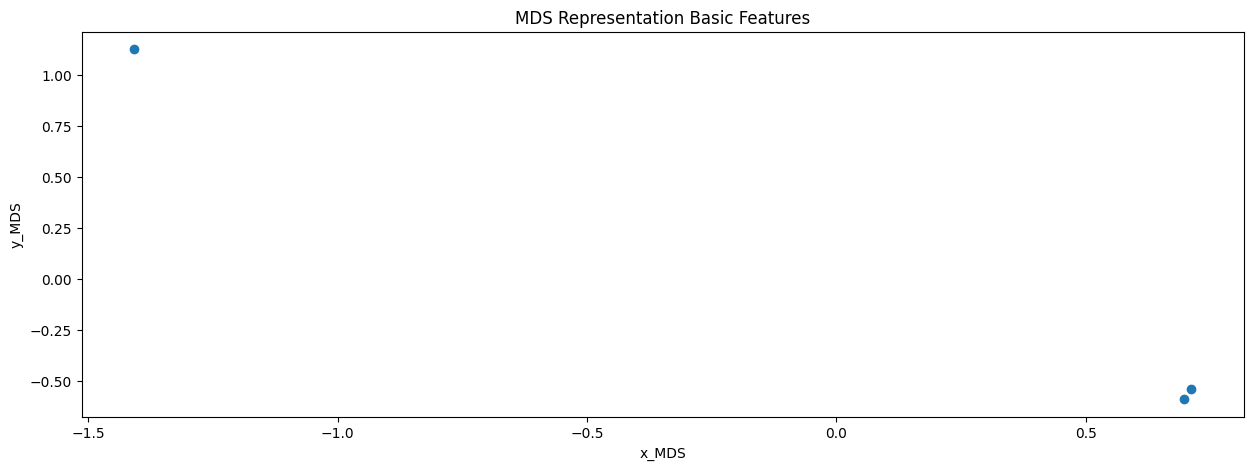

In [26]:
basic_mds_chosen_rep = dfmf.create_mds_represntation(basic_normalized_chosen_df)
#plot the mds
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
ax1.scatter(basic_mds_chosen_rep['x_MDS'], basic_mds_chosen_rep['y_MDS'])
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')

## Results:
- looks like might give good clustering results


## 3.2 check with mds for all station

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_31100\1362963622.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features = basic_features.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_31100\1362963622.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features = basic_features.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py

Stationsnummer        mean        std         min         max      median  \
0          2009.0  188.108382  78.797494   89.573903  337.357060  140.297354   
1          2016.0  316.691748  55.625792  248.814842  448.665434  302.312747   
2          2018.0  139.865863  58.649062   75.528888  259.285767  122.159567   
3          2019.0   36.497151  19.958256   13.504717   69.685184   27.609573   
4          2029.0  235.289996  51.252468  176.469974  349.239436  207.723992   

        range  
0  247.783157  
1  199.850592  
2  183.756880  
3   56.180466  
4  172.769462

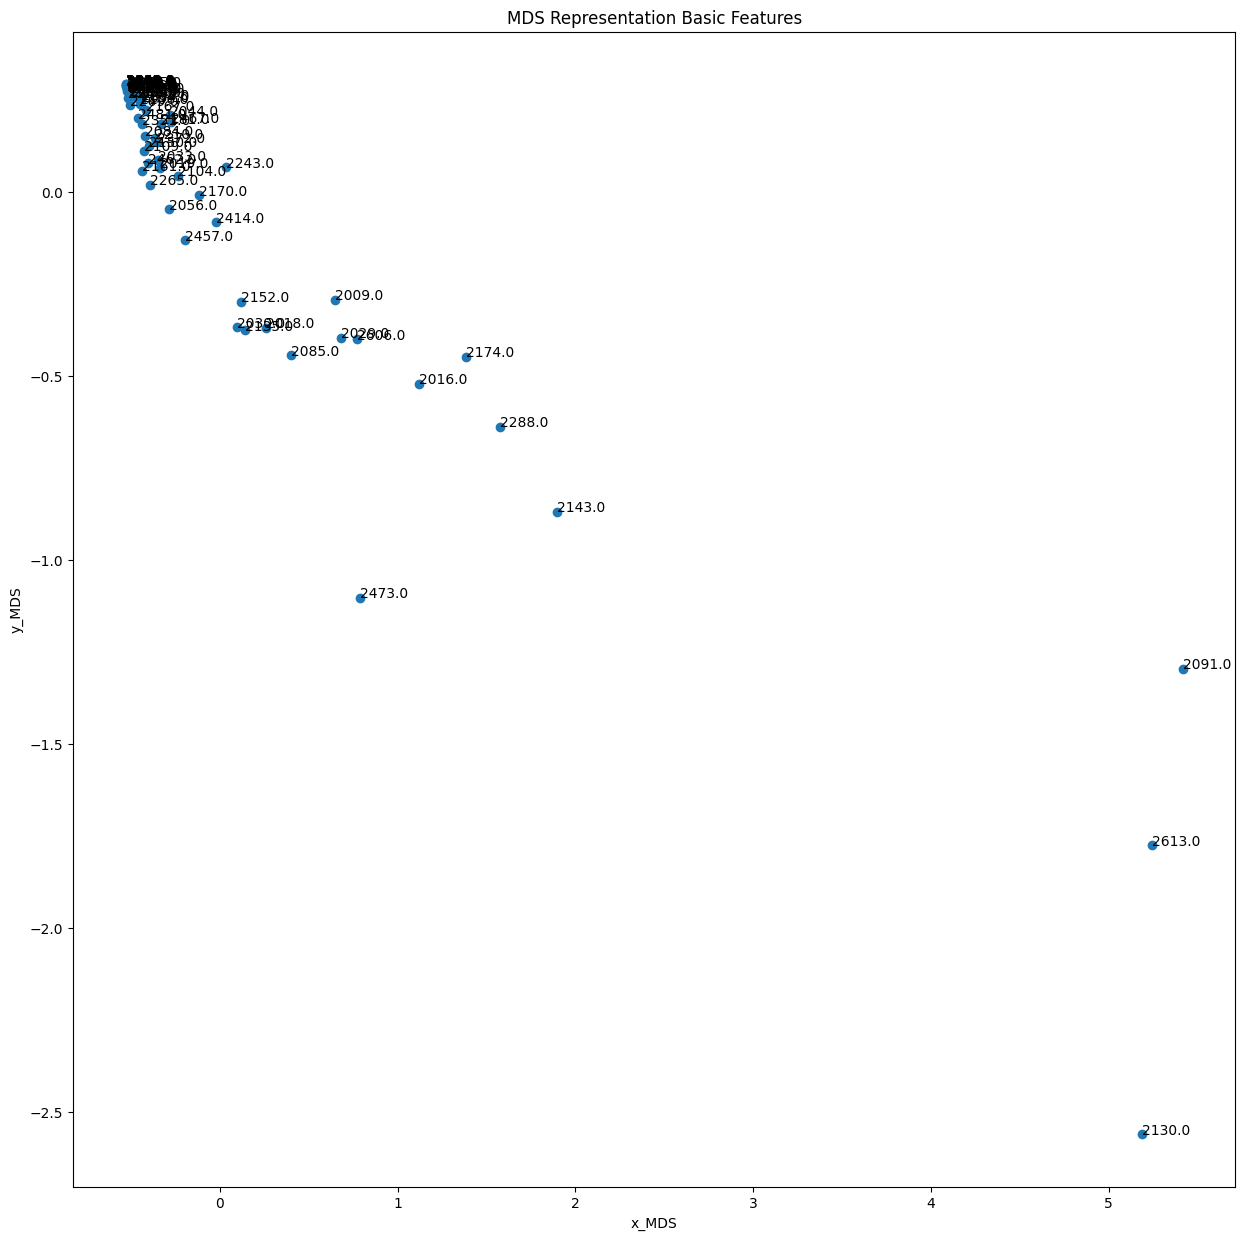

In [27]:
basic_features = pd.DataFrame(columns=['Stationsnummer', 'mean', 'std', 'min', 'max', 'median', 'range'])
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    basic_features = basic_features.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)

basic_features_normalized = dfmf.normalize_data(basic_features)
basic_features_mds = dfmf.create_mds_represntation(basic_features_normalized)

#plot the mds representation
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 15))
ax1.scatter(basic_features_mds['x_MDS'], basic_features_mds['y_MDS'])
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
# add stationsnummer to each point
for i, txt in enumerate(basic_features_mds['Stationsnummer']):
    ax1.annotate(txt, (basic_features_mds['x_MDS'][i], basic_features_mds['y_MDS'][i]))

basic_features.head()

## Results:
- clusters can be seen visually on the mds plot
- this already with rudimentary features and no feature selection
- the clusters are not perfect but they are clearly visible


# 4. Additional Features
- goal: to find the best features for the clustering
- calculate a lot of features and then select the best ones
- as discussed in the meeting 
    - max slope of the curve (done could be better)
    - time of Scheitelpunkt (done)
    - time above a average (done)
    - time of first upwards crossing of a threshold (done and downwards as well)
    - number of local maximas (not done)
    

In [28]:
#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)


#max slope of the running mean
additional_features = pd.DataFrame()
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    original_station_data = dfmf.get_station_df(station_number, flow_temp_df)
    #additional_features_all = additional_features_all.append({'Stationsnummer': station_number, 'max_slope': dfmf.get_max_slope(station_data),'day_of_max': dfmf.get_day_of_max(station_data)}, ignore_index=True, )
    additional_features = additional_features.append({
        'Stationsnummer': station_number,
              'time_above_average': dfmf.get_time_above_average(station_data,Wert),
                        'similarity_to_mean_year': dfmf.get_similarity_to_mean_year(original_station_data, Wert),
                        'day_of_max': dfmf.get_day_of_max(station_data,Wert),
                        'day_of_min': dfmf.get_day_of_min(station_data,Wert),
                          'day_first_upward_crossing_mean': dfmf.get_time_first_upward_crossing_mean(station_data,Wert),
                          'day_first_downward_crossing_mean' : dfmf.get_time_first_downward_crossing_mean(station_data,Wert),
                            'day_first_upward_crossing_high_quartile' :dfmf.get_time_first_upward_crossing_highquantile(station_data,Wert),
                              'day_downward_crossing_high_quartile' :dfmf.get_time_first_downward_crossing_highquantile(station_data,Wert),
                                'day_downward_crossing_low_quartile' :dfmf.get_time_first_downward_crossing_lowquantile(station_data,Wert),
                                'day_upward_crossing_low_quartile' :dfmf.get_time_first_upward_crossing_lowquantile(station_data,Wert),
                                #'number_of_maximas' : dfmf.get_number_of_maximas(station_data, Wert),
                                'number_of_peaks' : dfmf.get_number_of_peaks(station_data, Wert, distance=7),
                                'min_slope_5': dfmf.get_min_slope(station_data,Wert,5),
                                'max_slope_5': dfmf.get_max_slope(station_data,Wert,5),},      
                              ignore_index=True)

additional_features.head()
display(additional_features)

c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


C:\Users\janzu\AppData\Local\Temp\ipykernel_31100\1702167275.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features = additional_features.append({
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_31100\1702167275.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features = additional_features.append({
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: T

Stationsnummer  time_above_average  similarity_to_mean_year  day_of_max  \
0           2009.0               139.0              3200.007522       190.0   
1           2016.0               145.0              4821.109923       167.0   
2           2018.0               146.0              4282.846248       170.0   
3           2019.0               151.0              3543.289277       197.0   
4           2029.0               153.0              4997.246654       167.0   
..             ...                 ...                      ...         ...   
70          2612.0               146.0              4987.212154       130.0   
71          2613.0               140.0              2400.659433       165.0   
72          2617.0               125.0              1436.982127       170.0   
73          2634.0               140.0              8980.455683       134.0   
74          2635.0               175.0              4892.249719       126.0   

    day_of_min  day_first_upward_crossing_mean  \
0          4.0                           133.0   
1        339.0                            96.0   
2         31.0                           119.0   
3          5.0                           127.0   
4         60.0                            99.0   
..         ...                             ...   
70        35.0                           102.0   
71       339.0                           115.0   
72        68.0                           125.0   
73        29.0                            72.0   
74        50.0                            77.0   

    day_first_downward_crossing_mean  day_first_upward_crossing_high_quartile  \
0                              272.0                                    156.0   
1                              241.0                                    138.0   
2                              265.0                                    147.0   
3                              278.0                                    157.0   
4                              252.0                                    138.0   
..                               ...                                      ...   
70                             183.0                                    120.0   
71                             255.0                                    143.0   
72                             250.0                                    153.0   
73                             212.0                                     98.0   
74                             188.0                                     91.0   

    day_downward_crossing_high_quartile  day_downward_crossing_low_quartile  \
0                                 243.0                               292.0   
1                                 181.0                               252.0   
2                                 210.0                               283.0   
3                                 251.0                               298.0   
4                                 184.0                               259.0   
..                                  ...                                 ...   
70                                162.0                               205.0   
71                                186.0                               263.0   
72                                185.0                               276.0   
73                                171.0                               237.0   
74                                138.0                               296.0   

    day_upward_crossing_low_quartile  number_of_peaks  min_slope_5  \
0                              124.0             13.0   -22.972359   
1                              358.0             16.0   -21.028070   
2                               99.0              9.0   -19.839335   
3                              114.0             14.0    -4.660831   
4                               94.0             11.0   -17.137644   
..                               ...              ...          ...   
70                              95.0      

## illustrate the day of corssing features


# 5. All features 
- take basic features and merge with additional features
- normalize the data by
    - subtracting the mean
    - dividing by the standard deviation



## 5.1 day of the year normalized usually

c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


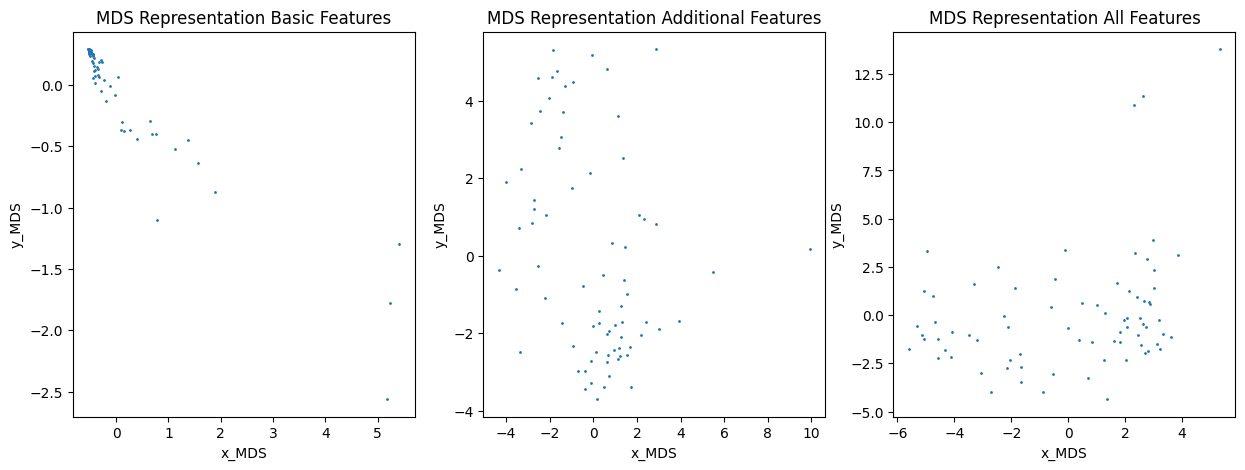

In [29]:
#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)


#concatenate all the features
all_features = pd.merge(basic_features, additional_features, on='Stationsnummer')
# normalize additional features
additional_features_force_normalized = dfmf.force_normalize_data(additional_features)
#concatenate the normalized additional features with the normalized basic features
all_features_force_normalized = dfmf.force_normalize_data(all_features)
additional_features_force_mds = dfmf.create_mds_represntation(additional_features_force_normalized)

all_features_force_mds = dfmf.create_mds_represntation(all_features_force_normalized)

#plot the mds for all features and the rudia features
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(basic_features_mds['x_MDS'], basic_features_mds['y_MDS'], s=1)
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
ax2.scatter(additional_features_force_mds['x_MDS'], additional_features_force_mds['y_MDS'], s=1)
ax2.set_title('MDS Representation Additional Features')
ax2.set_xlabel('x_MDS')
ax2.set_ylabel('y_MDS')
ax3.scatter(all_features_force_mds['x_MDS'], all_features_force_mds['y_MDS'], s=1)
ax3.set_title('MDS Representation All Features')
ax3.set_xlabel('x_MDS')
ax3.set_ylabel('y_MDS')


#set scale to the same
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())

all_features.head()

#save all features to csv for further analysis without normalization
all_features.to_pickle('original_features/all_features_no_sin_cos_flow.pkl')

## Result 
- the clusters are visible
- the importance of the additional features is very clear


c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


Text(0.5, 0, '')

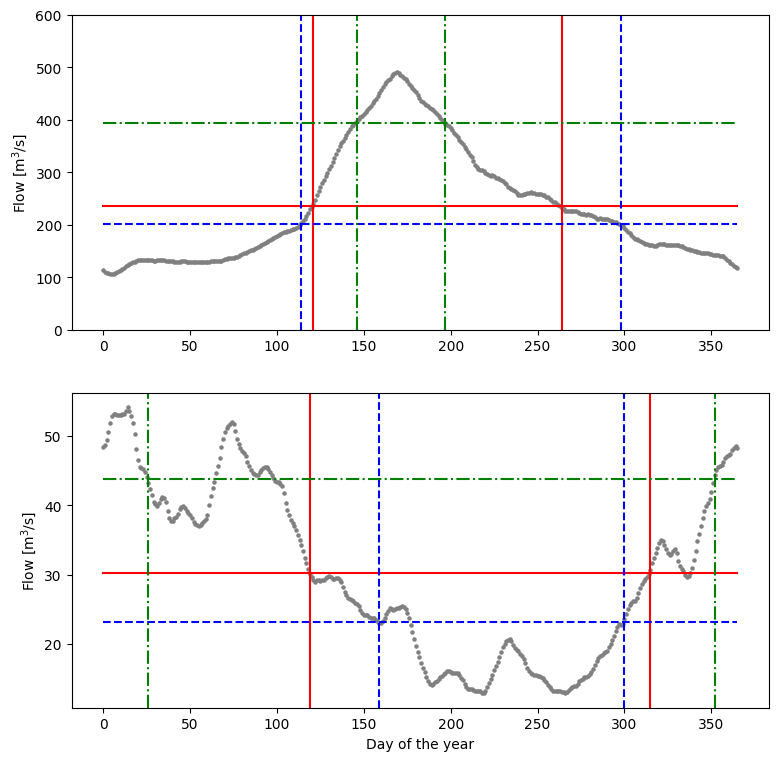

In [30]:
#plot the above made plots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,9))
#plot station 2606
station_number = 2473
station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
ax1.scatter(station_df.index, station_df[Wert], label=station_number, color='grey' ,s = 5)
# get day of year of first upward crossing of mean
ax1.plot(station_df.index, [station_df[Wert].mean()]*366, label='mean', color = 'red')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_upward_crossing_mean'].values[0], color = 'red', label = 'day upward crossing mean')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_downward_crossing_mean'].values[0], color = 'red',  label = 'day downward crossing mean')

# for the low quartile 
quartile = all_features.loc[all_features['Stationsnummer'] == station_number]['range'].values[0]*0.25
ax1.plot(station_df.index,[all_features.loc[all_features['Stationsnummer'] == station_number]['min'].values[0]+ quartile]*366, label='low quartile', color = 'blue', linestyle = '--')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_upward_crossing_low_quartile'].values[0], color = 'blue', linestyle = '--', label = 'day upward crossing low quartile')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_downward_crossing_low_quartile'].values[0], color = 'blue', linestyle = '--', label = 'day downward crossing low quartile')

ax1.plot(station_df.index,[all_features.loc[all_features['Stationsnummer'] == station_number]['max'].values[0]- quartile]*366, label='high quartile', color = 'green', linestyle = '-.')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_upward_crossing_high_quartile'].values[0], color = 'green', linestyle = '-.', label = 'day upward crossing high quartile')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_downward_crossing_high_quartile'].values[0], color = 'green', linestyle = '-.', label = 'day downward crossing high quartile')

ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')


#ax1.set_title('Station: 2606')
#plot station 2030
station_number = 2210
station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
ax2.scatter(station_df.index, station_df[Wert], label=station_number, color='grey' ,s = 5)
# get day of year of first upward crossing of mean
ax2.plot(station_df.index, [station_df[Wert].mean()]*366, label='mean', color = 'red')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_upward_crossing_mean'].values[0], color = 'red', label = 'day upward crossing mean')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_downward_crossing_mean'].values[0], color = 'red',label = 'day downward crossing mean')

# for the low quartile 
quartile = all_features.loc[all_features['Stationsnummer'] == station_number]['range'].values[0]*0.25
ax2.plot(station_df.index,[all_features.loc[all_features['Stationsnummer'] == station_number]['min'].values[0]+ quartile]*366, label='low quartile', color = 'blue', linestyle = '--')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_upward_crossing_low_quartile'].values[0], color = 'blue', linestyle = '--', label = 'day upward crossing low quartile')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_downward_crossing_low_quartile'].values[0], color = 'blue', linestyle = '--', label = 'day downward crossing low quartile')
#the linstyle arg for dotted lines is '--'another option is '-.' for dashdot
ax2.plot(station_df.index,[all_features.loc[all_features['Stationsnummer'] == station_number]['max'].values[0]- quartile]*366, label='high quartile', color = 'green', linestyle = '-.')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_upward_crossing_high_quartile'].values[0], color = 'green', linestyle = '-.', label = 'day upward crossing high quartile')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_downward_crossing_high_quartile'].values[0], color = 'green', linestyle = '-.', label = 'day downward crossing high quartile')

ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')
#ax2.set_title('Station: 2030')

#set scale of y axis to be the same for both plots
ax1.set_ylim(0, 600)


#remove y label from second plot and remove y ticks from second plot
ax1.xaxis.set_label_text('')


# #change 2606 in legend to data 
# handles, labels = ax1.get_legend_handles_labels()
# labels[0] = 'data'
# ax1.legend(handles, labels, loc="upper right", )

# #change 2030 in legend to data
# handles, labels = ax2.get_legend_handles_labels()
# labels[0] = 'data'
# ax2.legend(handles, labels, loc="upper right", )


# title to size grösse

#make legend without station number






c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)
c:\Users\janzu\OneDrive - Universitaet Bern\Documents\GitHub\Clustering-of-Hydrological-Stations\df_manipulation_functions.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_data = daily_averaged_data.iloc[-window+1:].append(daily_averaged_data)


Text(0.5, 0, '')

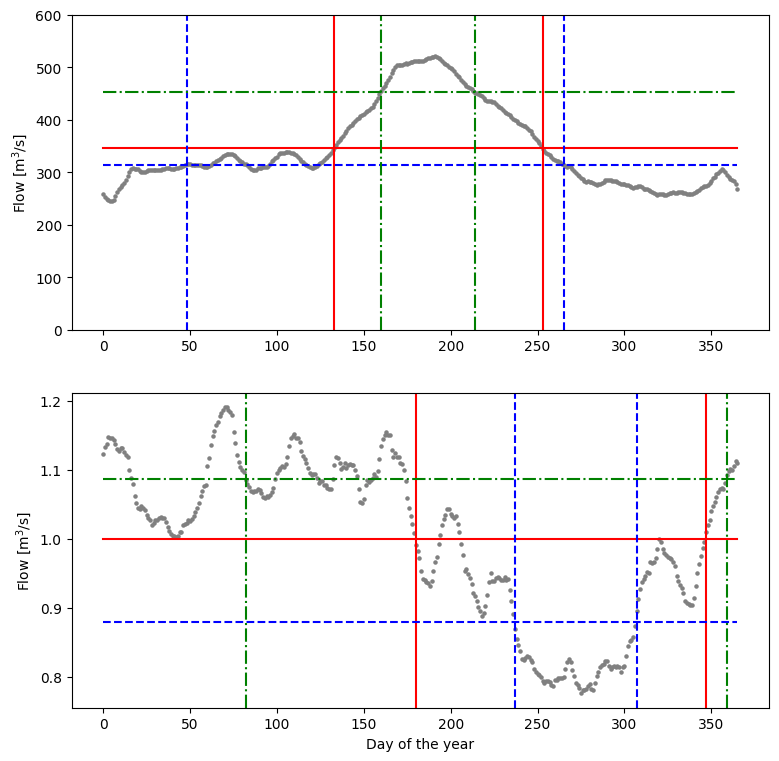

In [31]:
#plot the above made plots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,9))
#plot station 2606
station_number = 2174
station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
ax1.scatter(station_df.index, station_df[Wert], label=station_number, color='grey' ,s = 5)
# get day of year of first upward crossing of mean
ax1.plot(station_df.index, [station_df[Wert].mean()]*366, label='mean', color = 'red')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_upward_crossing_mean'].values[0], color = 'red', label = 'day upward crossing mean')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_downward_crossing_mean'].values[0], color = 'red',  label = 'day downward crossing mean')

# for the low quartile 
quartile = all_features.loc[all_features['Stationsnummer'] == station_number]['range'].values[0]*0.25
ax1.plot(station_df.index,[all_features.loc[all_features['Stationsnummer'] == station_number]['min'].values[0]+ quartile]*366, label='low quartile', color = 'blue', linestyle = '--')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_upward_crossing_low_quartile'].values[0], color = 'blue', linestyle = '--', label = 'day upward crossing low quartile')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_downward_crossing_low_quartile'].values[0], color = 'blue', linestyle = '--', label = 'day downward crossing low quartile')

ax1.plot(station_df.index,[all_features.loc[all_features['Stationsnummer'] == station_number]['max'].values[0]- quartile]*366, label='high quartile', color = 'green', linestyle = '-.')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_upward_crossing_high_quartile'].values[0], color = 'green', linestyle = '-.', label = 'day upward crossing high quartile')
ax1.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_downward_crossing_high_quartile'].values[0], color = 'green', linestyle = '-.', label = 'day downward crossing high quartile')

ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')


#ax1.set_title('Station: 2606')
#plot station 2030
station_number = 2500
station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
ax2.scatter(station_df.index, station_df[Wert], label=station_number, color='grey' ,s = 5)
# get day of year of first upward crossing of mean
ax2.plot(station_df.index, [station_df[Wert].mean()]*366, label='mean', color = 'red')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_upward_crossing_mean'].values[0], color = 'red', label = 'day upward crossing mean')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_downward_crossing_mean'].values[0], color = 'red',label = 'day downward crossing mean')

# for the low quartile 
quartile = all_features.loc[all_features['Stationsnummer'] == station_number]['range'].values[0]*0.25
ax2.plot(station_df.index,[all_features.loc[all_features['Stationsnummer'] == station_number]['min'].values[0]+ quartile]*366, label='low quartile', color = 'blue', linestyle = '--')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_upward_crossing_low_quartile'].values[0], color = 'blue', linestyle = '--', label = 'day upward crossing low quartile')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_downward_crossing_low_quartile'].values[0], color = 'blue', linestyle = '--', label = 'day downward crossing low quartile')
#the linstyle arg for dotted lines is '--'another option is '-.' for dashdot
ax2.plot(station_df.index,[all_features.loc[all_features['Stationsnummer'] == station_number]['max'].values[0]- quartile]*366, label='high quartile', color = 'green', linestyle = '-.')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_first_upward_crossing_high_quartile'].values[0], color = 'green', linestyle = '-.', label = 'day upward crossing high quartile')
ax2.axvline(additional_features.loc[additional_features['Stationsnummer'] == station_number]['day_downward_crossing_high_quartile'].values[0], color = 'green', linestyle = '-.', label = 'day downward crossing high quartile')

ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')
#ax2.set_title('Station: 2030')

#set scale of y axis to be the same for both plots
ax1.set_ylim(0, 600)


#remove y label from second plot and remove y ticks from second plot
ax1.xaxis.set_label_text('')


# #change 2606 in legend to data 
# handles, labels = ax1.get_legend_handles_labels()
# labels[0] = 'data'
# ax1.legend(handles, labels, loc="upper right", )

# #change 2030 in legend to data
# handles, labels = ax2.get_legend_handles_labels()
# labels[0] = 'data'
# ax2.legend(handles, labels, loc="upper right", )


# title to size grösse

#make legend without station number






# 5.2 Take periodicity for certain features into account 
- for all day features use\
    - day_sin = sin (day /365 *2pi)\
    - day_cos = cos (day /365 *2pi)

as new feature

In [32]:
#create feature dataframe with periodicity taken into account
#take all features all and replace the day of the year features with their sin and cosine function
import importlib
importlib.reload(dfmf)

#day_of_max
all_features['day_of_max_sin'], all_features['day_of_max_cos'] = dfmf.get_sin_cos_rep(all_features['day_of_max'])
all_features= all_features.drop(['day_of_max'], axis=1)
#day_first_upward_crossing_mean
all_features['day_first_upward_crossing_mean_sin'], all_features['day_first_upward_crossing_mean_cos'] = dfmf.get_sin_cos_rep(all_features['day_first_upward_crossing_mean'])
all_features= all_features.drop(['day_first_upward_crossing_mean'], axis=1)
#day_first_upward_crossing_high_quartile
all_features['day_first_upward_crossing_high_quartile_sin'], all_features['day_first_upward_crossing_high_quartile_cos'] = dfmf.get_sin_cos_rep(all_features['day_first_upward_crossing_high_quartile'])
all_features= all_features.drop(['day_first_upward_crossing_high_quartile'], axis=1)
#day_downward_crossing_high_quartile
all_features['day_downward_crossing_high_quartile_sin'], all_features['day_downward_crossing_high_quartile_cos'] = dfmf.get_sin_cos_rep(all_features['day_downward_crossing_high_quartile'])
all_features= all_features.drop(['day_downward_crossing_high_quartile'], axis=1)
#day_downward_crossing_low_quartile
all_features['day_downward_crossing_low_quartile_sin'], all_features['day_downward_crossing_low_quartile_cos'] = dfmf.get_sin_cos_rep(all_features['day_downward_crossing_low_quartile'])
all_features= all_features.drop(['day_downward_crossing_low_quartile'], axis=1)
#day_upward_crossing_low_quartile
all_features['day_upward_crossing_low_quartile_sin'], all_features['day_upward_crossing_low_quartile_cos'] = dfmf.get_sin_cos_rep(all_features['day_upward_crossing_low_quartile'])
all_features= all_features.drop(['day_upward_crossing_low_quartile'], axis=1)
#day_first_downward_crossing_mean
all_features['day_first_downward_crossing_mean_sin'], all_features['day_first_downward_crossing_mean_cos'] = dfmf.get_sin_cos_rep(all_features['day_first_downward_crossing_mean'])
all_features= all_features.drop(['day_first_downward_crossing_mean'], axis=1)
#day_of_min
all_features['day_of_min_sin'], all_features['day_of_min_cos'] = dfmf.get_sin_cos_rep(all_features['day_of_min'])
all_features= all_features.drop(['day_of_min'], axis=1)






all_features.head()
print(all_features)

    Stationsnummer         mean         std         min          max  \
0           2009.0   188.108382   78.797494   89.573903   337.357060   
1           2016.0   316.691748   55.625792  248.814842   448.665434   
2           2018.0   139.865863   58.649062   75.528888   259.285767   
3           2019.0    36.497151   19.958256   13.504717    69.685184   
4           2029.0   235.289996   51.252468  176.469974   349.239436   
..             ...          ...         ...         ...          ...   
70          2612.0     2.893777    2.220447    0.372302     8.267907   
71          2613.0  1052.181373  209.561222  807.429472  1546.289508   
72          2617.0     2.471242    1.318510    1.107379     6.097112   
73          2634.0    15.296834    4.301655   10.003732    24.877853   
74          2635.0     0.382332    0.142496    0.172948     0.693720   

        median       range  time_above_average  similarity_to_mean_year  \
0   140.297354  247.783157               139.0              

# Normalization of data and saving

In [33]:
all_features_normalized = dfmf.normalize_data(all_features)
all_features_mds = dfmf.create_mds_represntation(all_features_normalized)

additional_features_normalized = all_features_normalized.drop(['mean','std', 'min', 'max',  'median', 'range'], axis=1)
additional_features_mds = dfmf.create_mds_represntation(additional_features_normalized)

basic_features_normalized = all_features_normalized[['Stationsnummer', 'mean','std', 'min', 'max',  'median', 'range']]
basic_features_mds = dfmf.create_mds_represntation(basic_features_normalized)


#save all features in a pickle file 
all_features.to_pickle('Flow_Features/all_features_flow.pkl')
#all_features_normalized.to_pickle('Flow_Features/all_features_normalized_flow.pkl')
all_features_mds.to_pickle('Flow_mds/all_features_mds_flow.pkl')

basic_features.to_pickle('Flow_Features/basic_features_flow.pkl')
basic_features_mds.to_pickle('Flow_mds/basic_features_mds_flow.pkl')

additional_features.to_pickle('Flow_Features/additional_features_flow.pkl')
additional_features_mds.to_pickle('Flow_mds/additional_features_mds_flow.pkl')

all_features_normalized.head()

c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


mean       std       min       max    median     range  \
0  0.443824  0.680325  0.302248  0.500930  0.361726  0.630498   
1  0.774938  0.463137  0.880325  0.680507  0.816754  0.496357   
2  0.319595  0.491474  0.251262  0.374975  0.310785  0.451318   
3  0.053411  0.128825  0.026102  0.069086  0.045236  0.094291   
4  0.565321  0.422146  0.617699  0.520100  0.551097  0.420569   

   time_above_average  similarity_to_mean_year  number_of_peaks  min_slope_5  \
0           -0.158940                -0.078508        -0.234375    -0.509596   
1           -0.079470                 0.128101        -0.117188    -0.458871   
2           -0.066225                 0.059500        -0.390625    -0.427858   
3            0.000000                -0.034757        -0.195313    -0.031867   
4            0.026490                 0.150550        -0.312500    -0.357374   

   ...  day_downward_crossing_high_quartile_cos  \
0  ...                                -0.504961   
1  ...                                -0.999667   
2  ...                                -0.890028   
3  ...                                -0.381689   
4  ...                                -0.999667   

   day_downward_crossing_low_quartile_sin  \
0                               -0.951057   
1                               -0.930724   
2                               -0.987349   
3                               -0.914128   
4                               -0.967938   

   day_downward_crossing_low_quartile_cos  \
0                                0.309017   
1                               -0.365723   
2                                0.158559   
3                                0.405426   
4                               -0.251190   

   day_upward_crossing_low_quartile_sin  day_upward_crossing_low_quartile_cos  \
0                              0.845249                             -0.534373   
1                             -0.120208                              0.992749   
2                              0.991114                             -0.133015   
3                              0.924291                             -0.381689   
4                              0.998880                             -0.047321   

   day_first_downward_crossing_mean_sin  day_first_downward_crossing_mean_cos  \
0                             -0.999546                             -0.030120   
1                             -0.845249                             -0.534373   
2                             -0.988678                             -0.150055   
3                             -0.997325                              0.073095   
4                             -0.930724                             -0.365723   

   day_of_min_sin  day_of_min_cos  Stationsnummer  
0        0.068802        0.997630          2009.0  
1       -0.432776        0.901502          2016.0  
2        0.508671        0.860961          2018.0  
3        0.085965        0.996298          2019.0  
4        0.858764        0.512371          2029.0  

[5 rows x 28 columns]

(-2.703836258109014, 0.43467338690485324)

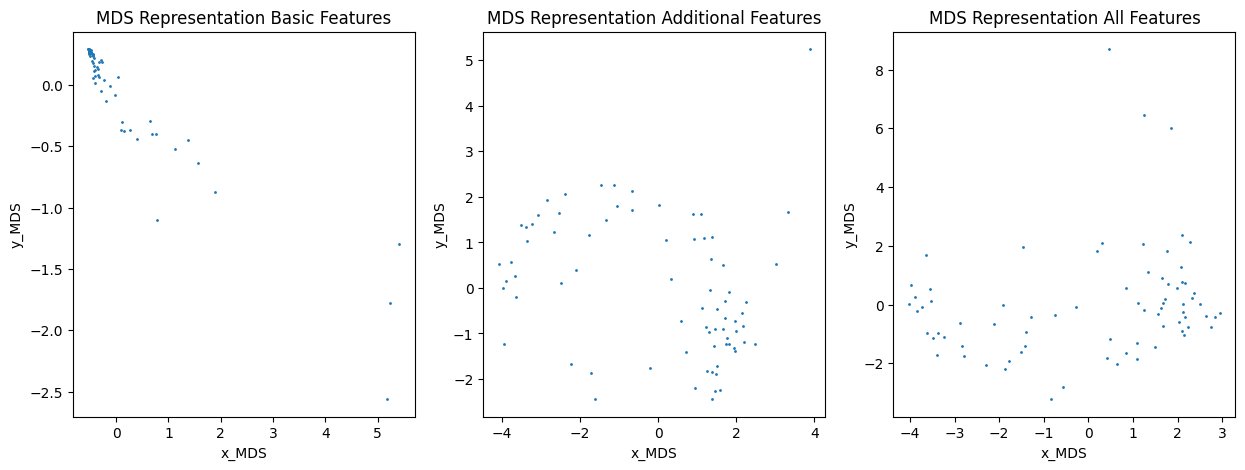

In [34]:
#plot the mds for all features and the rudia features
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(basic_features_mds['x_MDS'], basic_features_mds['y_MDS'], s=1)
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
ax2.scatter(additional_features_mds['x_MDS'], additional_features_mds['y_MDS'], s=1)
ax2.set_title('MDS Representation Additional Features')
ax2.set_xlabel('x_MDS')
ax2.set_ylabel('y_MDS')
ax3.scatter(all_features_mds['x_MDS'], all_features_mds['y_MDS'], s=1)
ax3.set_title('MDS Representation All Features')
ax3.set_xlabel('x_MDS')
ax3.set_ylabel('y_MDS')


#set scale to the same
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())